In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import classification_report, f1_score, recall_score, accuracy_score, precision_score,  confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.feature_selection import RFE


In [2]:
data = pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


- customerID : L'identifiant unique du client dans la base de données. Cela permet de distinguer chaque client dans le dataset.

- gender : Le genre du client (par exemple, "Male" ou "Female").

- SeniorCitizen : Indique si le client est un senior (généralement, 1 pour senior et 0 pour non senior).

- Partner : Indique si le client a un partenaire (par exemple, "Yes" ou "No").

- Dependents : Indique si le client a des personnes à charge (enfants ou autres personnes dépendantes, par exemple, "Yes" ou "No").

- tenure : Le nombre de mois pendant lesquels le client est resté avec l'entreprise. Cela représente la durée de la relation avec l'entreprise.

- PhoneService : Indique si le client a un service téléphonique avec l'entreprise ("Yes" ou "No").

- MultipleLines : Indique si le client a plusieurs lignes téléphoniques ("Yes", "No", ou "No phone service").

- InternetService : Le type de service Internet que le client utilise, par exemple, "DSL", "Fiber optic", ou "No".

- OnlineSecurity : Indique si le client a souscrit un service de sécurité en ligne ("Yes" ou "No").

- OnlineBackup : Indique si le client a souscrit un service de sauvegarde en ligne ("Yes" ou "No").

- DeviceProtection : Indique si le client a souscrit un service de protection de ses appareils ("Yes" ou "No").

- TechSupport : Indique si le client a accès à un service de support technique ("Yes" ou "No").

- StreamingTV : Indique si le client a accès au service de streaming de télévision ("Yes" ou "No").

- StreamingMovies : Indique si le client a accès au service de streaming de films ("Yes" ou "No").

- Contract : Le type de contrat que le client a avec l'entreprise. Par exemple, "Month-to-month", "One year", ou "Two year".

- PaperlessBilling : Indique si le client utilise la facturation électronique (sans papier) ("Yes" ou "No").

- PaymentMethod : La méthode de paiement choisie par le client. Cela pourrait être "Electronic check", "Mailed check", "Bank transfer", ou "Credit card".

- MonthlyCharges : Le montant que le client paie chaque mois pour les services fournis.

- TotalCharges : Le montant total payé par le client au fil du temps, en fonction de la durée de son abonnement et des frais mensuels.

- Churn : La variable cible, indiquant si le client a quitté l'entreprise ou non (churn). Cela pourrait être "Yes" (le client a quitté) ou "No" (le client est toujours avec l'entreprise).

In [3]:
data.shape

(7043, 21)

In [4]:
data['TotalCharges'] = data['TotalCharges'].replace(' ', np.nan).astype(float)

In [5]:
data['TotalCharges'].sample(20)

192     1375.40
39      1105.40
3566    4449.75
5216    1604.50
1883    3653.35
4981     712.75
4505    1776.00
3166     664.40
4471    3273.55
876     1582.75
3160    3121.40
3912    6758.45
1787    4599.15
40       475.70
6702    1601.50
2235    3211.20
4548    1855.65
5122    1336.15
5532     689.35
1250    5744.35
Name: TotalCharges, dtype: float64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
data.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:

data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [9]:
data['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [10]:
data.drop(columns=['customerID'], inplace=True)


In [11]:
num_var = data.select_dtypes(['float','int'])
cat_var = data.select_dtypes('object')


In [12]:
cat_var

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7039,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
7040,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
7041,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


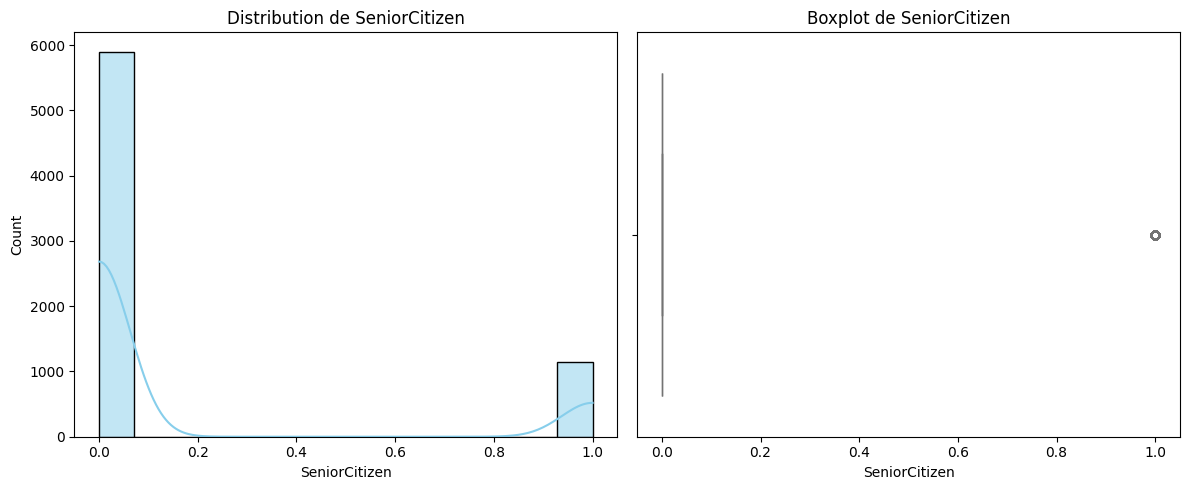

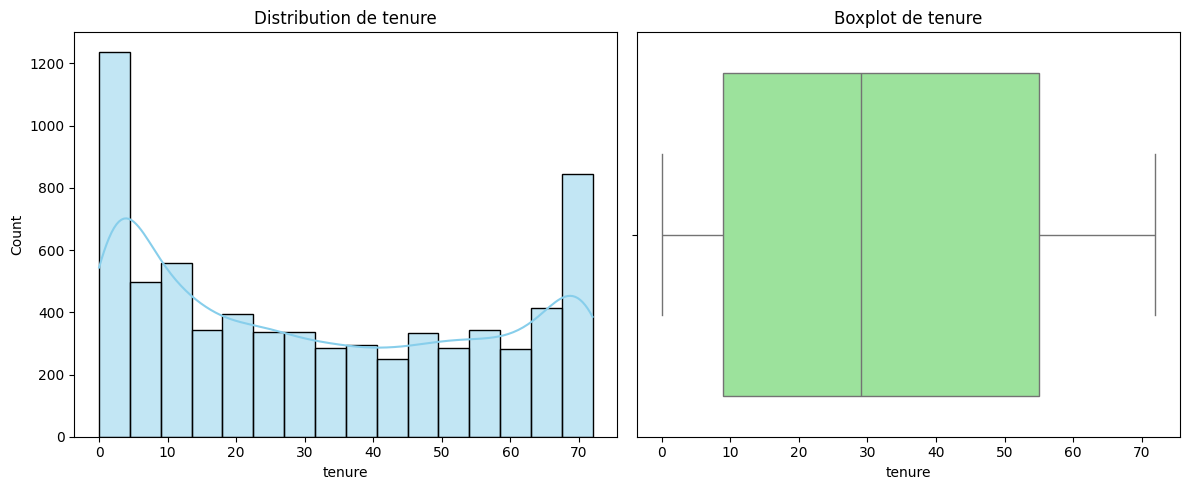

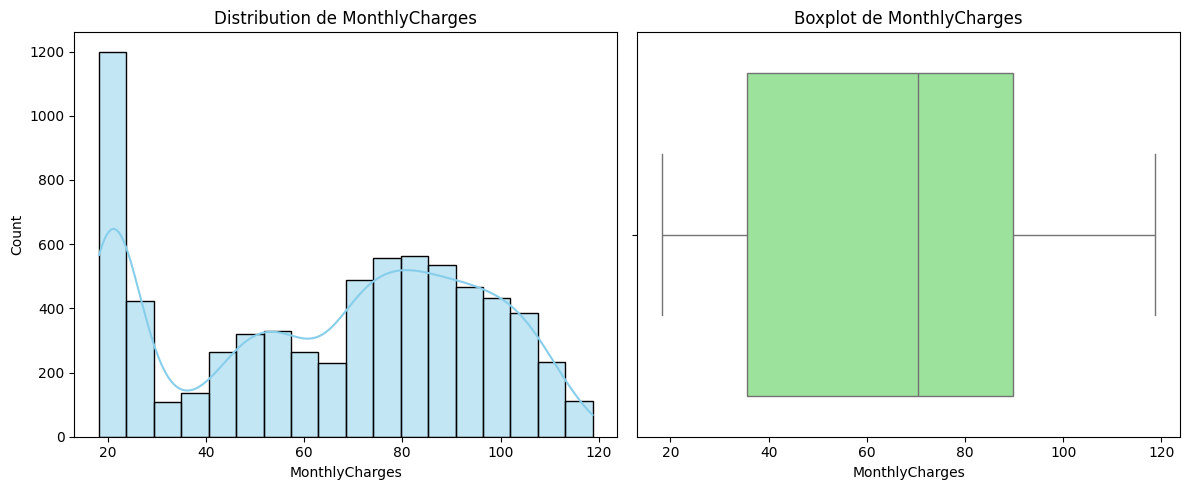

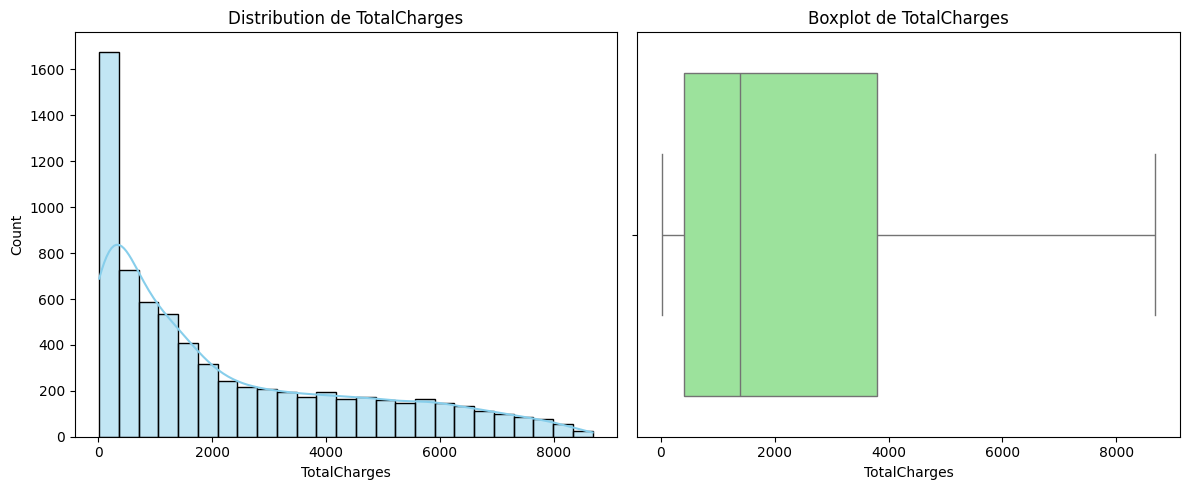

In [13]:
for var in num_var:
    plt.figure(figsize=(12,5))
    
    # Histogramme
    plt.subplot(1, 2, 1)
    sns.histplot(data[var], kde=True, color='skyblue')
    plt.title(f'Distribution de {var}')
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[var], color='lightgreen')
    plt.title(f'Boxplot de {var}')
    
    plt.tight_layout()
    plt.show()

In [14]:
for var in num_var:
    print(f'{var} : {data[var].skew()}')

SeniorCitizen : 1.8336327440928564
tenure : 0.2395397495619829
MonthlyCharges : -0.22052443394398033
TotalCharges : 0.961642499724251


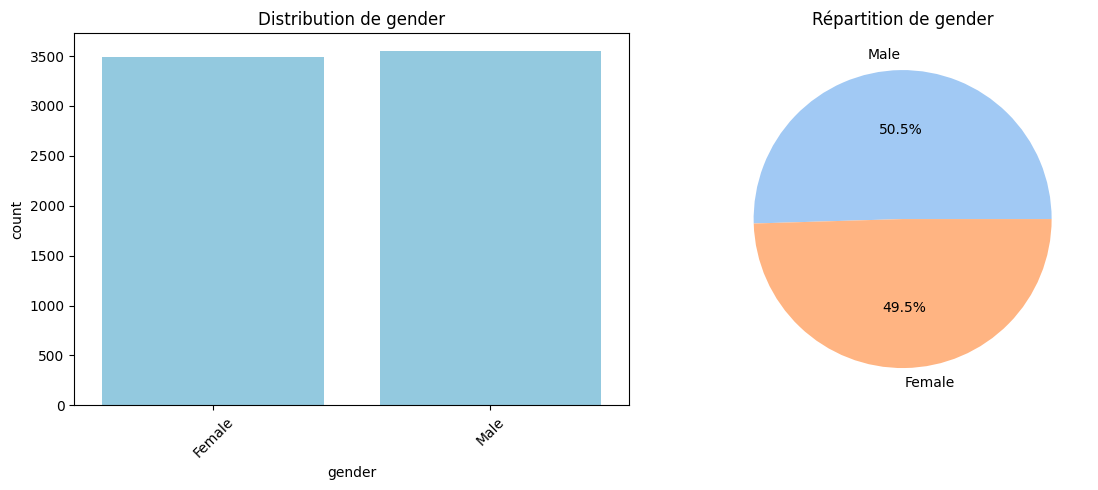

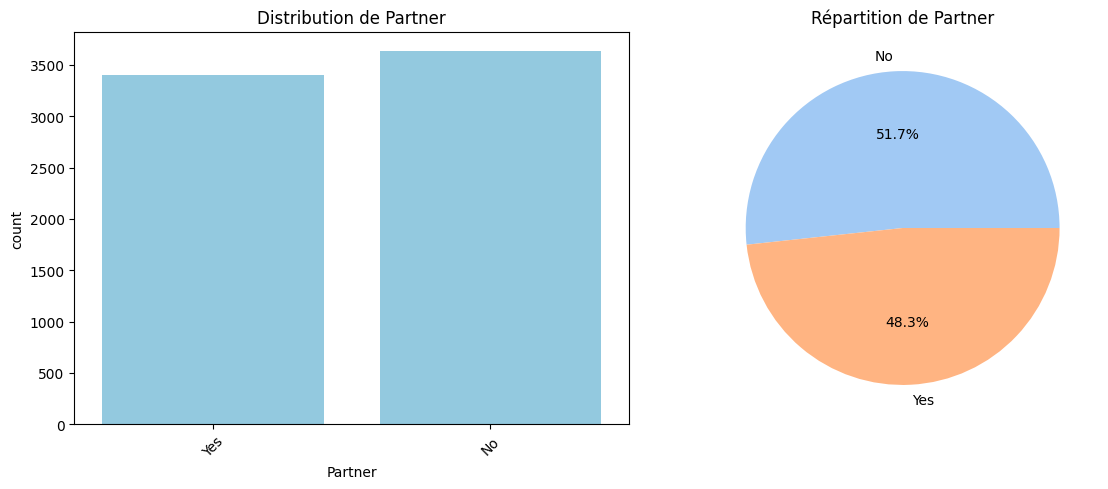

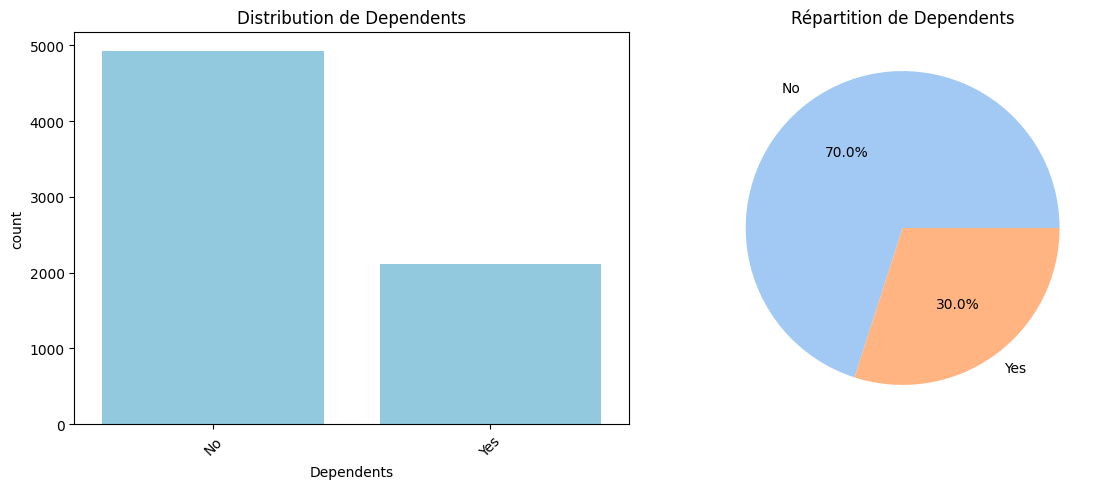

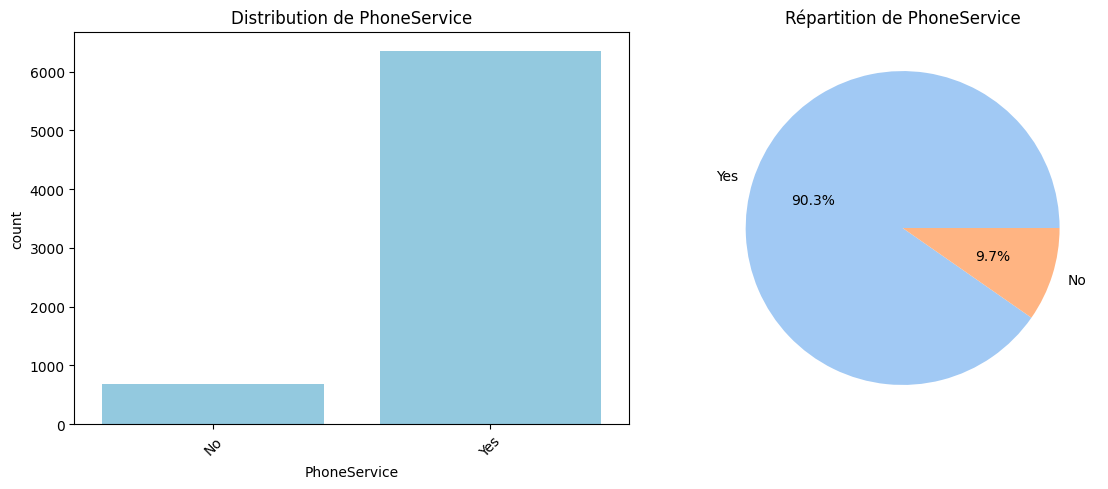

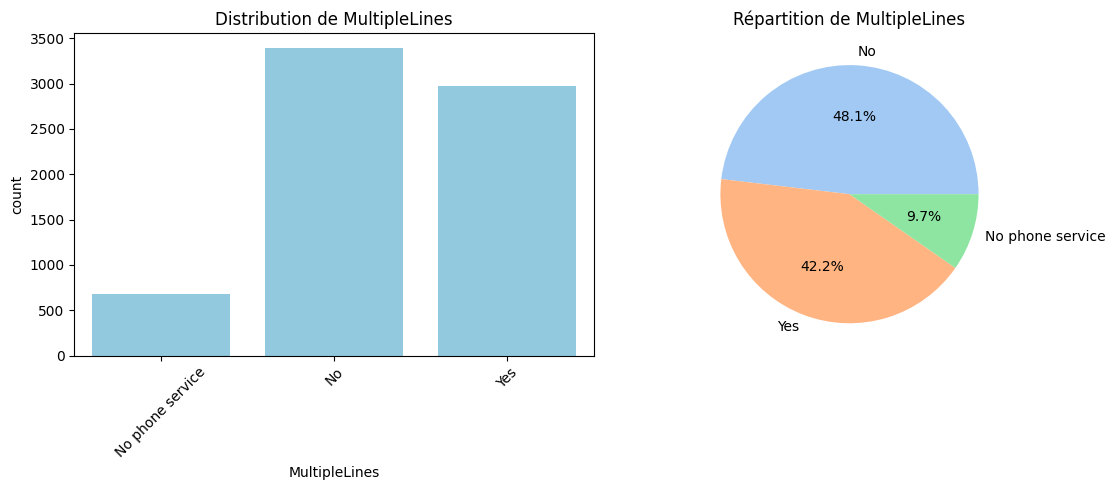

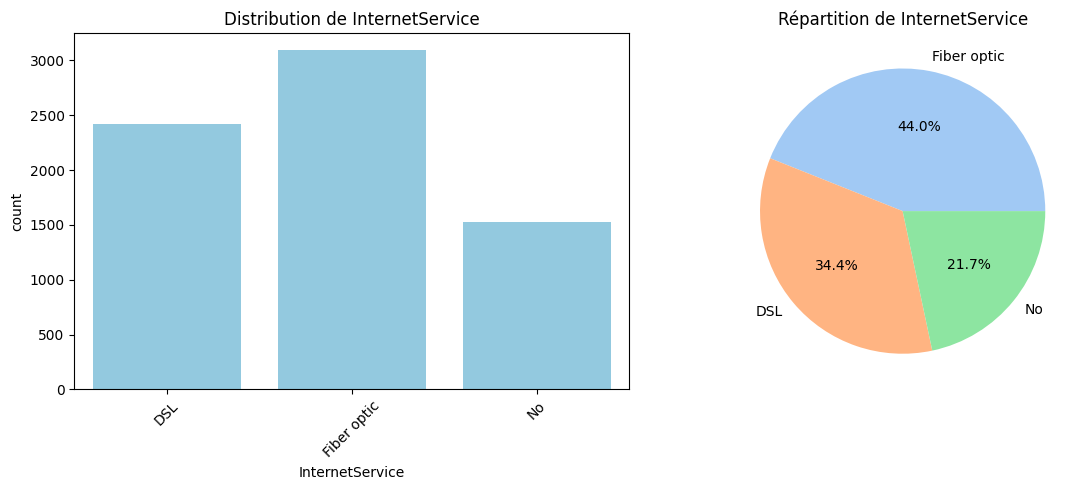

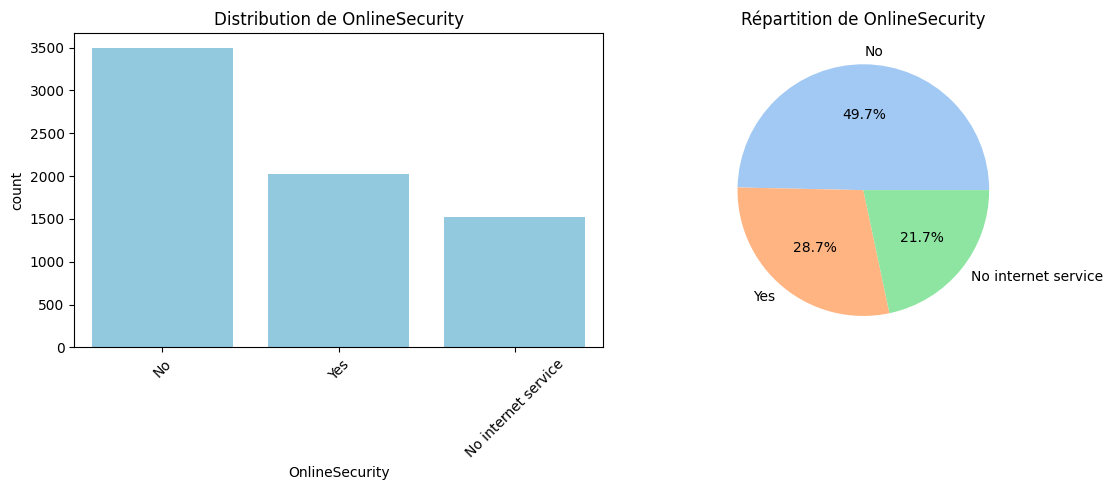

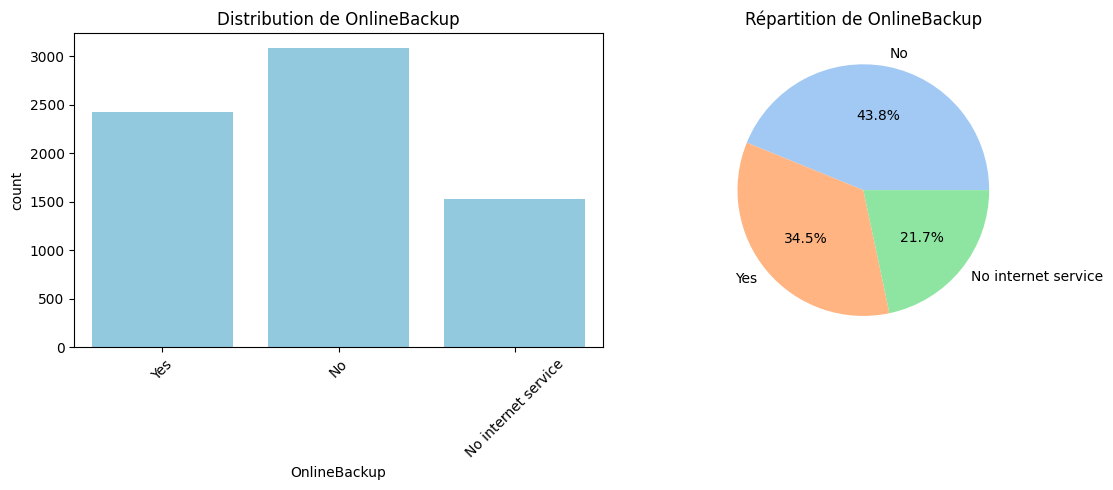

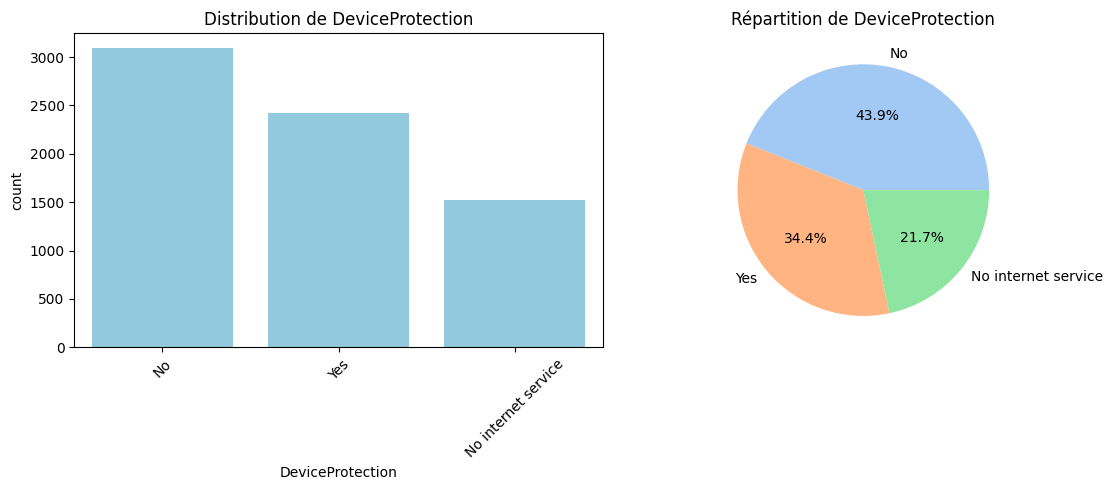

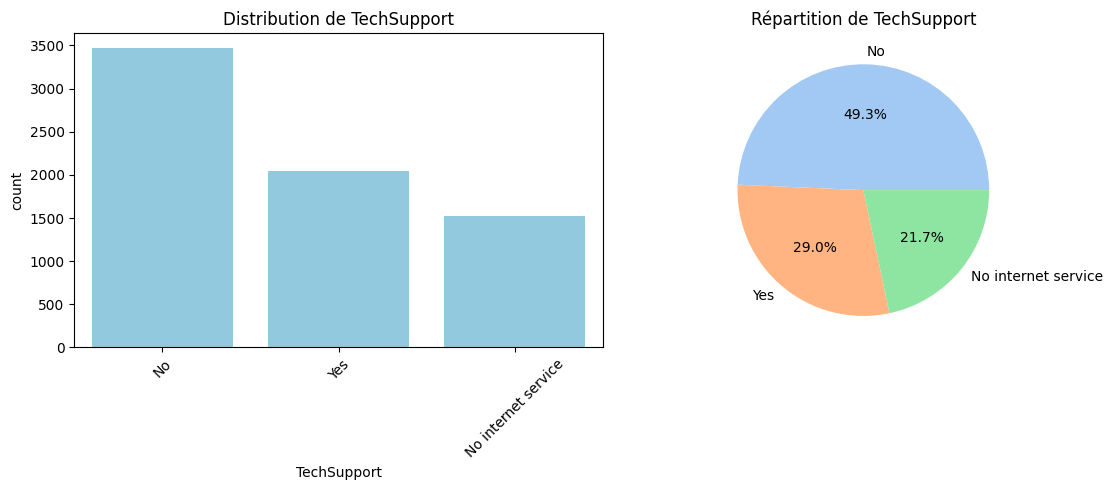

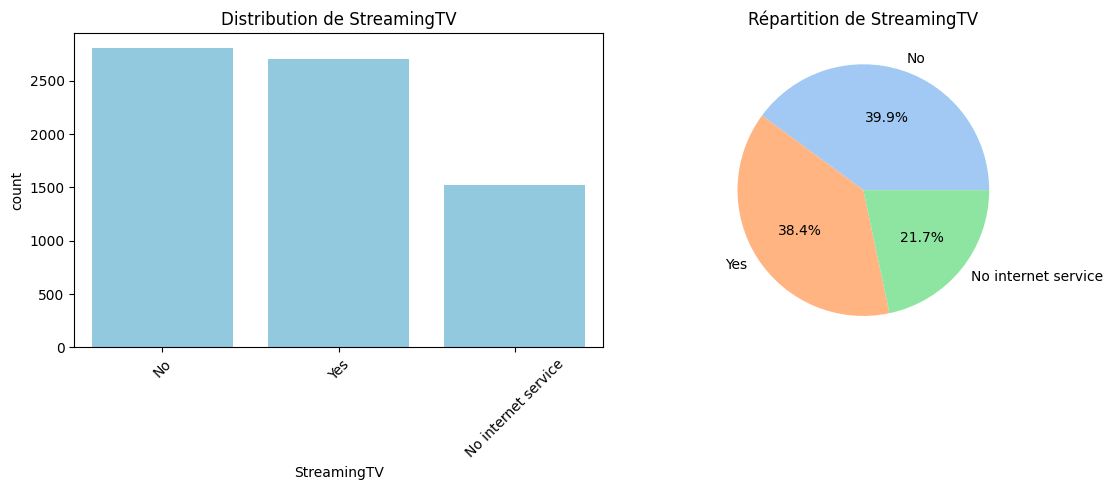

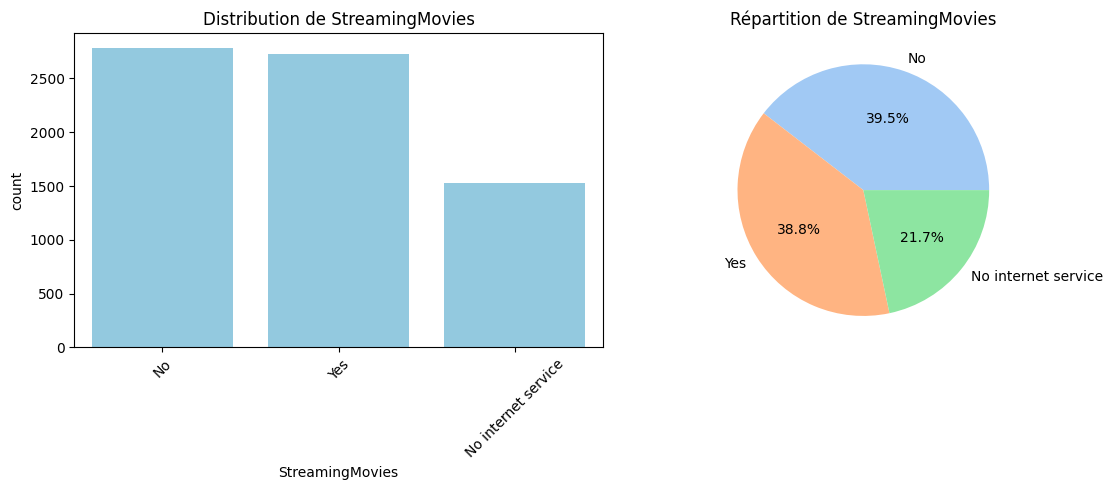

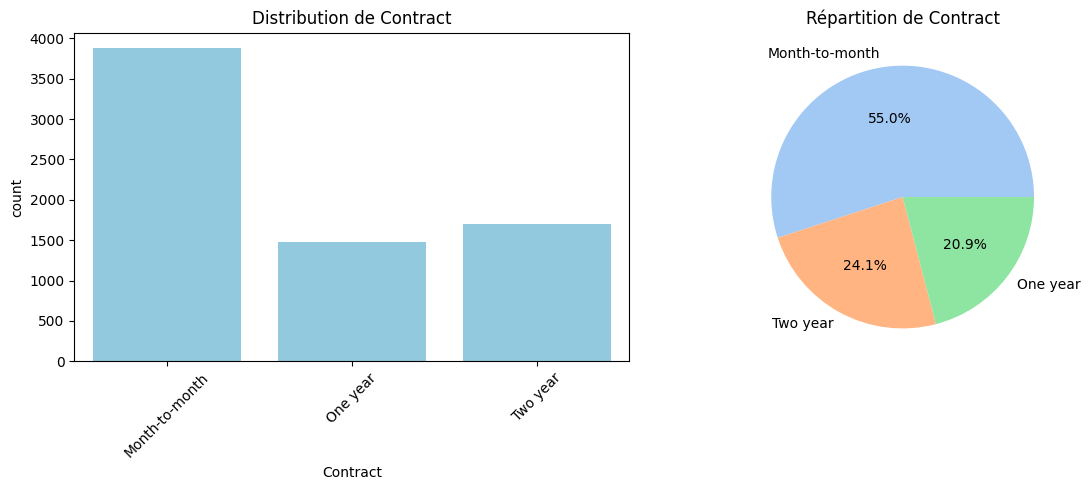

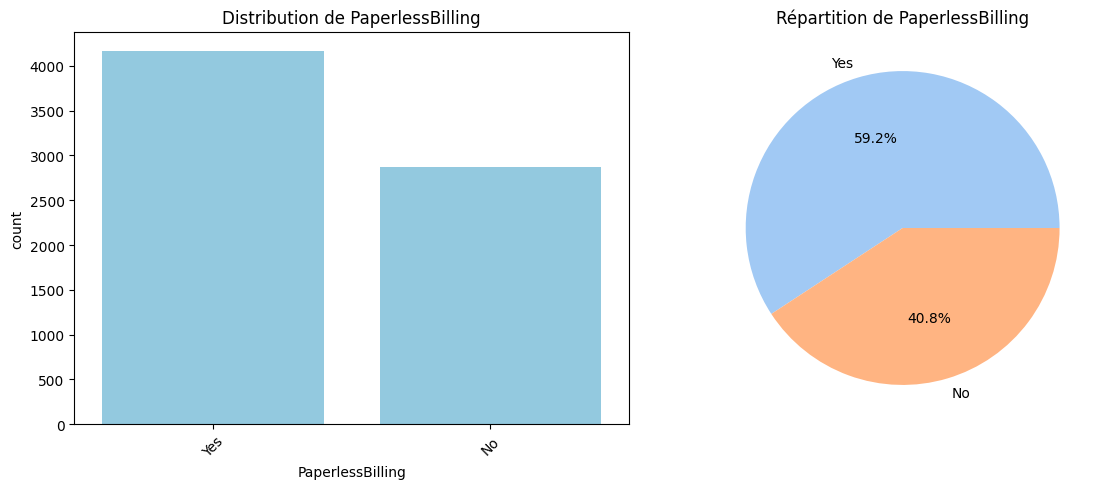

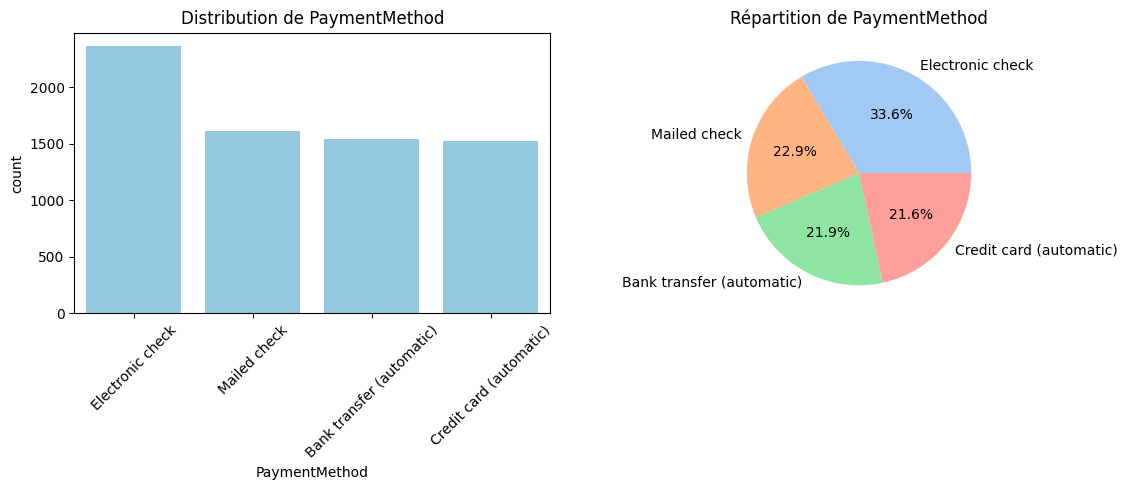

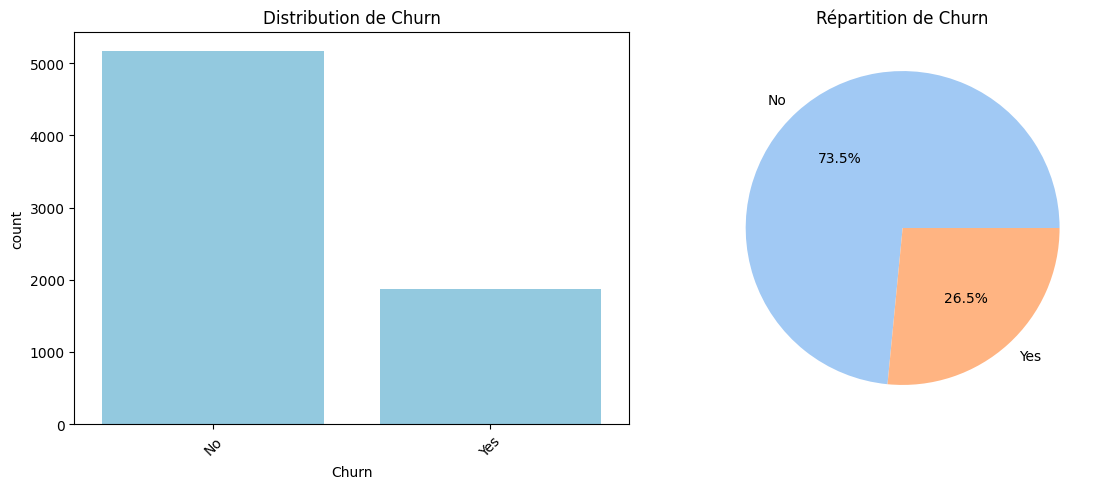

In [15]:
for var in cat_var:
    plt.figure(figsize=(12,5))
    
    # Barplot
    plt.subplot(1, 2, 1)
    sns.countplot(x=data[var], color='skyblue')
    plt.title(f'Distribution de {var}')
    plt.xticks(rotation=45)

    # Pieplot
    plt.subplot(1, 2, 2)
    data[var].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('pastel'))
    plt.title(f'Répartition de {var}')
    plt.ylabel('')  # Enlève l'étiquette "y"

    plt.tight_layout()
    plt.show()

Test t pour SeniorCitizen: Statistique t = -12.8079, P-value = 0.0000


C:\Users\PP\AppData\Local\Temp\ipykernel_7072\3840749767.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=var, data=data, palette='Set2')


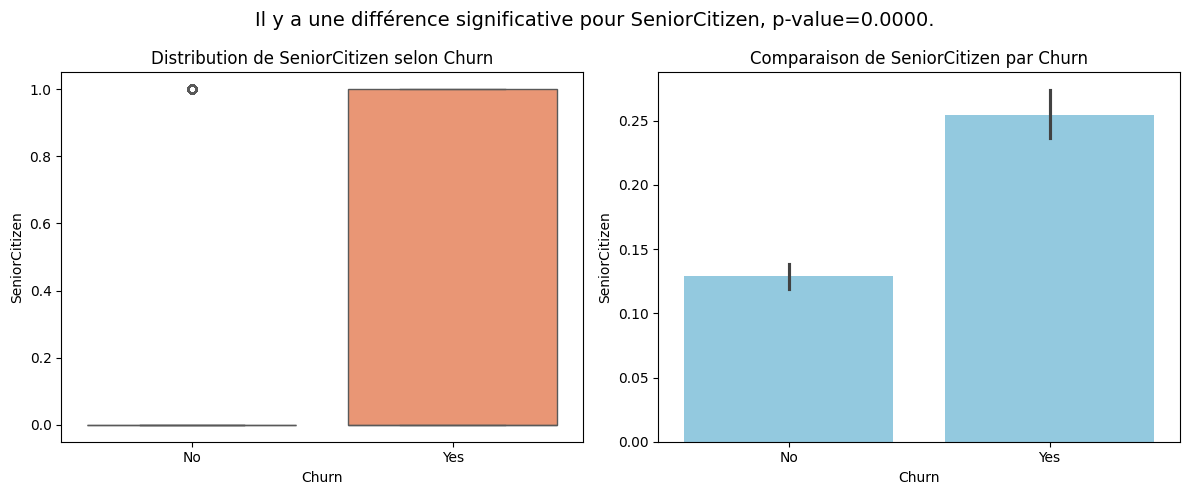

Test t pour tenure: Statistique t = 31.5796, P-value = 0.0000


C:\Users\PP\AppData\Local\Temp\ipykernel_7072\3840749767.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=var, data=data, palette='Set2')


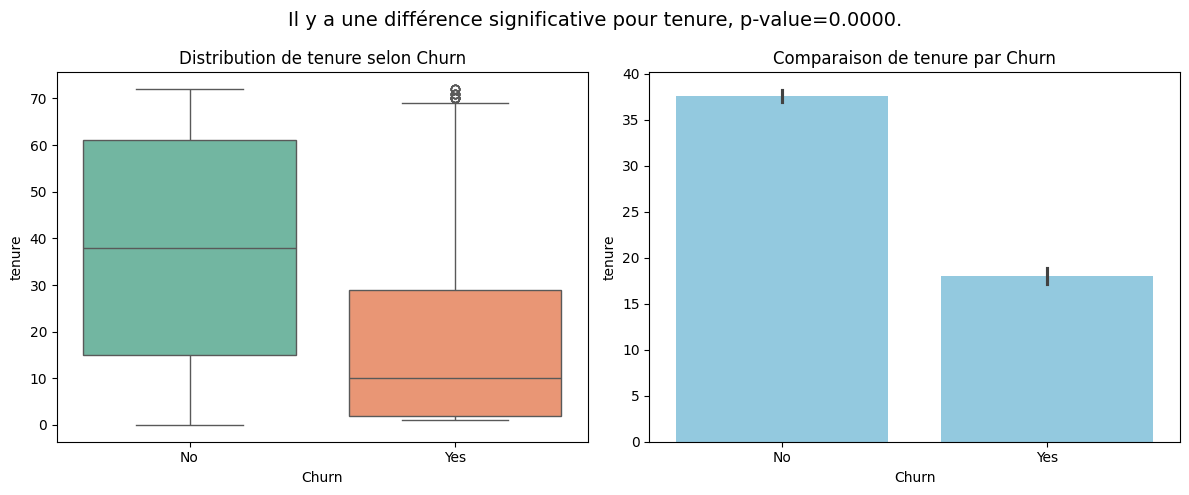

Test t pour MonthlyCharges: Statistique t = -16.5367, P-value = 0.0000


C:\Users\PP\AppData\Local\Temp\ipykernel_7072\3840749767.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=var, data=data, palette='Set2')


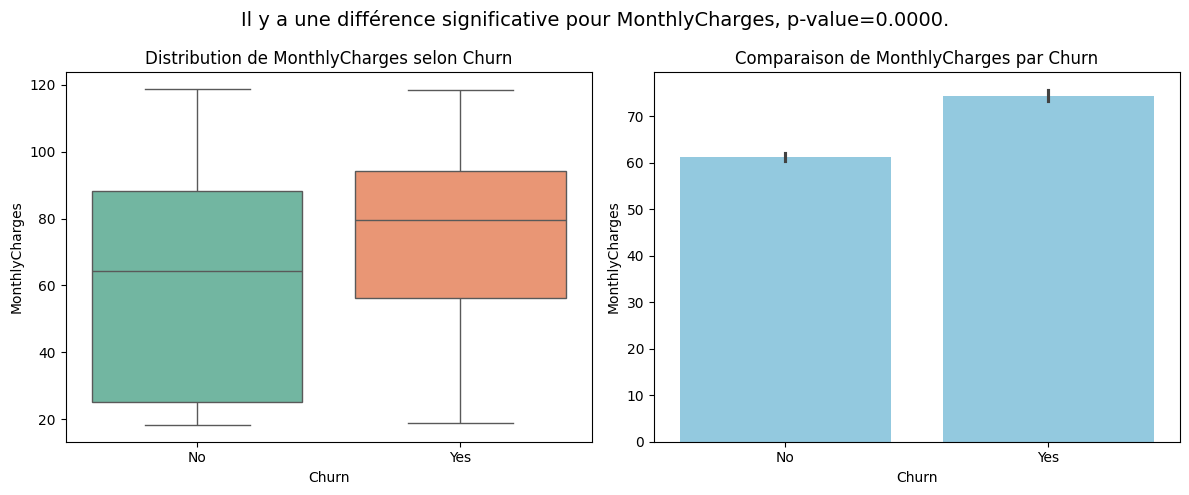

Test t pour TotalCharges: Statistique t = 17.0688, P-value = 0.0000


C:\Users\PP\AppData\Local\Temp\ipykernel_7072\3840749767.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=var, data=data, palette='Set2')


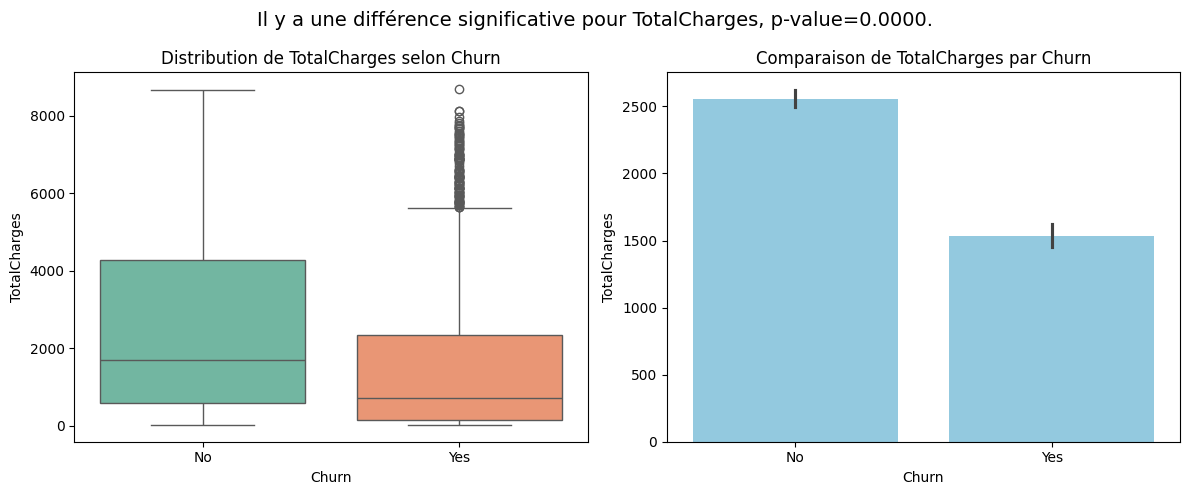

In [16]:
from scipy.stats import ttest_ind


for var in num_var:
    plt.figure(figsize=(12, 5))
    
    group1 = data[data['Churn'] == 'No'][var]
    group2 = data[data['Churn'] == 'Yes'][var]
    
    if len(group1) > 1 and len(group2) > 1 and group1.nunique() > 1 and group2.nunique() > 1:
        stat, p_value = ttest_ind(group1.dropna(), group2.dropna(), nan_policy='omit')
    else:
        stat = np.nan
    
    print(f"Test t pour {var}: Statistique t = {stat:.4f}, P-value = {p_value:.4f}")
    
    plt.subplot(1, 2, 1)
    sns.boxplot(x='Churn', y=var, data=data, palette='Set2')
    plt.title(f'Distribution de {var} selon Churn')
    
    plt.subplot(1, 2, 2)
    sns.barplot(x='Churn', y=var, data=data, color='skyblue')
    plt.title(f'Comparaison de {var} par Churn')
    
    if p_value is not np.nan and p_value < 0.05:
        plt.suptitle(f'Il y a une différence significative pour {var}, p-value={p_value:.4f}.', fontsize=14)
    else:
        plt.suptitle(f'Il n\'y a pas de différence significative pour {var}, p-value={p_value:.4f}.', fontsize=14)

    plt.tight_layout()
    plt.show()


Variable: gender
Tableau de contingence :
Churn     No  Yes
gender           
Female  2549  939
Male    2625  930
Chi2 = 0.4841, p-value = 0.4866, degrés de liberté = 1
V de Cramer = 0.0000


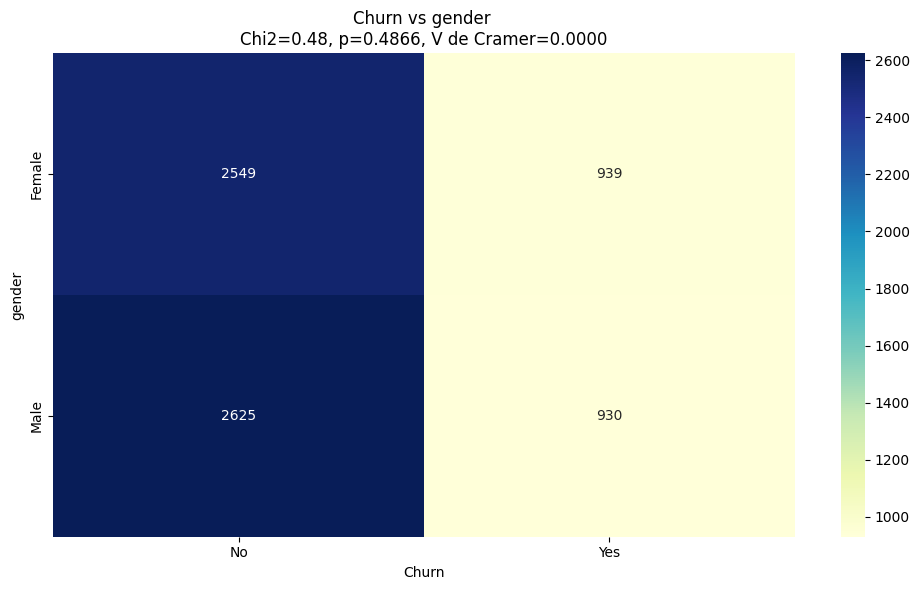


Variable: Partner
Tableau de contingence :
Churn      No   Yes
Partner            
No       2441  1200
Yes      2733   669
Chi2 = 158.7334, p-value = 0.0000, degrés de liberté = 1
V de Cramer = 0.1497


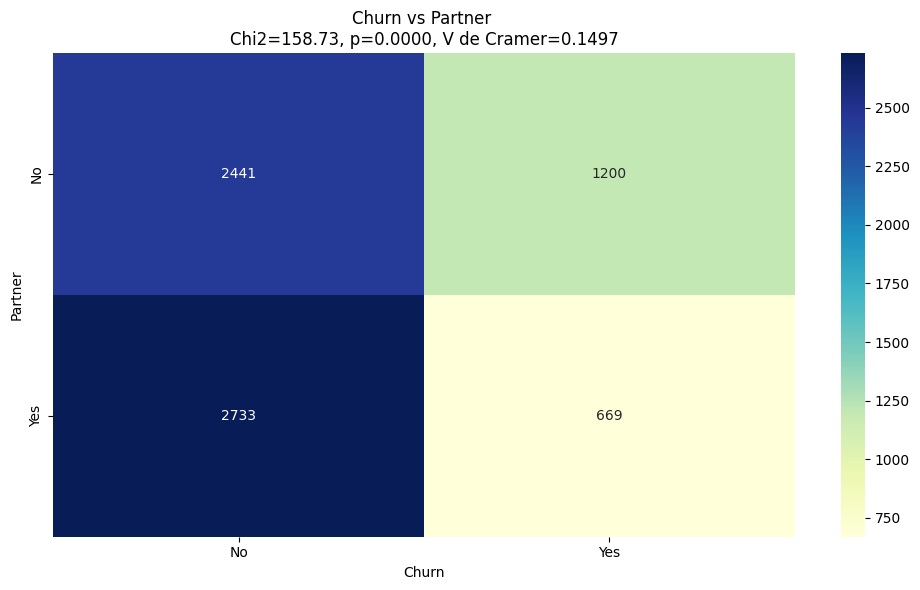


Variable: Dependents
Tableau de contingence :
Churn         No   Yes
Dependents            
No          3390  1543
Yes         1784   326
Chi2 = 189.1292, p-value = 0.0000, degrés de liberté = 1
V de Cramer = 0.1634


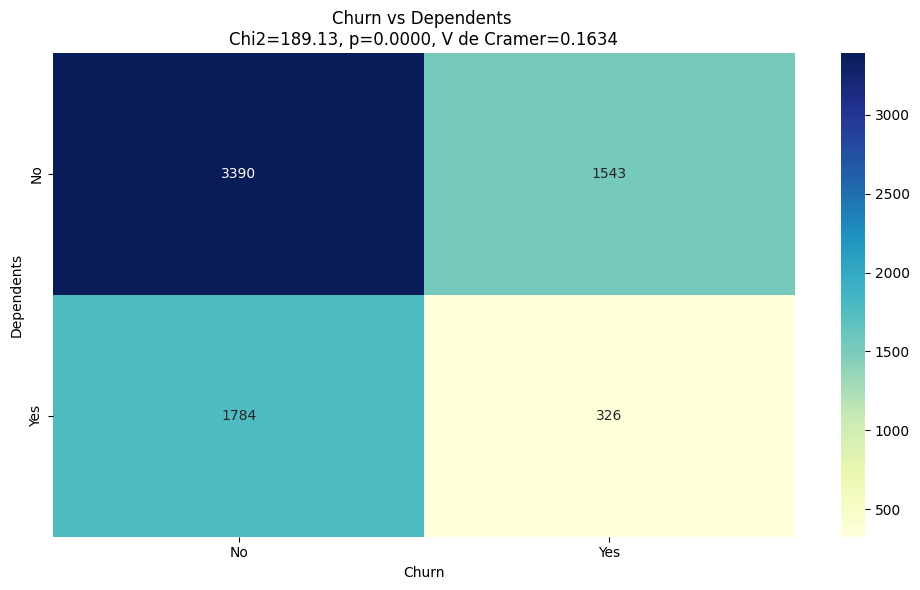


Variable: PhoneService
Tableau de contingence :
Churn           No   Yes
PhoneService            
No             512   170
Yes           4662  1699
Chi2 = 0.9150, p-value = 0.3388, degrés de liberté = 1
V de Cramer = 0.0000


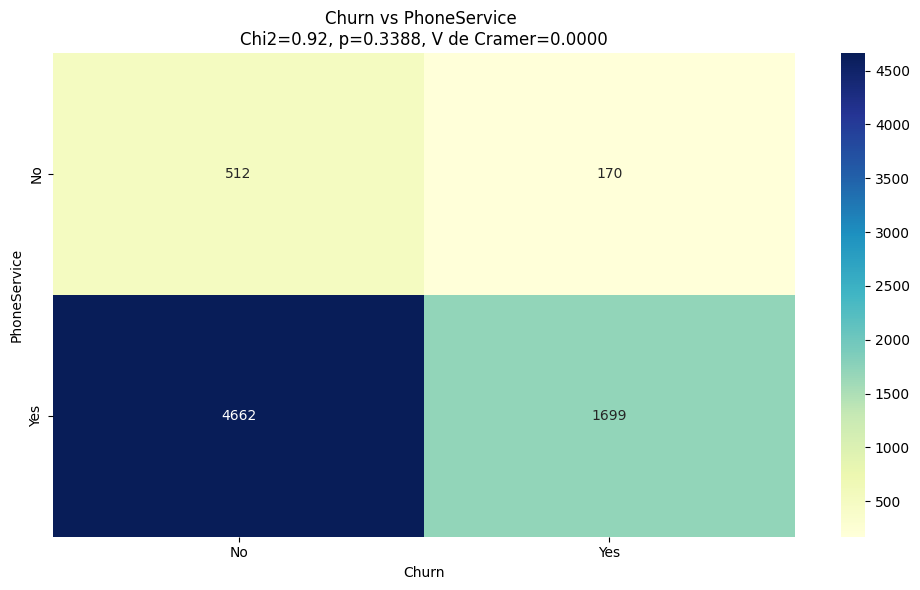


Variable: MultipleLines
Tableau de contingence :
Churn               No  Yes
MultipleLines              
No                2541  849
No phone service   512  170
Yes               2121  850
Chi2 = 11.3304, p-value = 0.0035, degrés de liberté = 2
V de Cramer = 0.0364


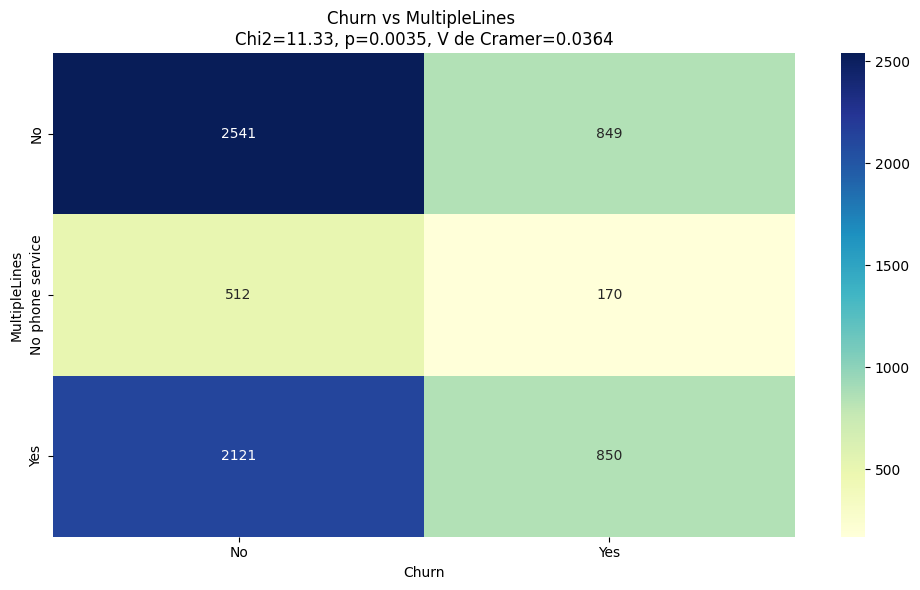


Variable: InternetService
Tableau de contingence :
Churn              No   Yes
InternetService            
DSL              1962   459
Fiber optic      1799  1297
No               1413   113
Chi2 = 732.3096, p-value = 0.0000, degrés de liberté = 2
V de Cramer = 0.3220


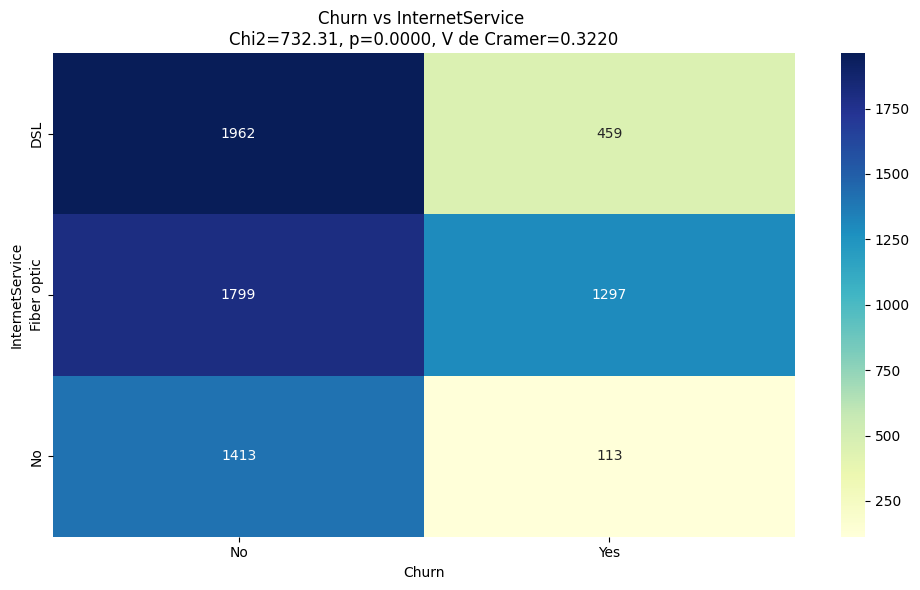


Variable: OnlineSecurity
Tableau de contingence :
Churn                  No   Yes
OnlineSecurity                 
No                   2037  1461
No internet service  1413   113
Yes                  1724   295
Chi2 = 849.9990, p-value = 0.0000, degrés de liberté = 2
V de Cramer = 0.3470


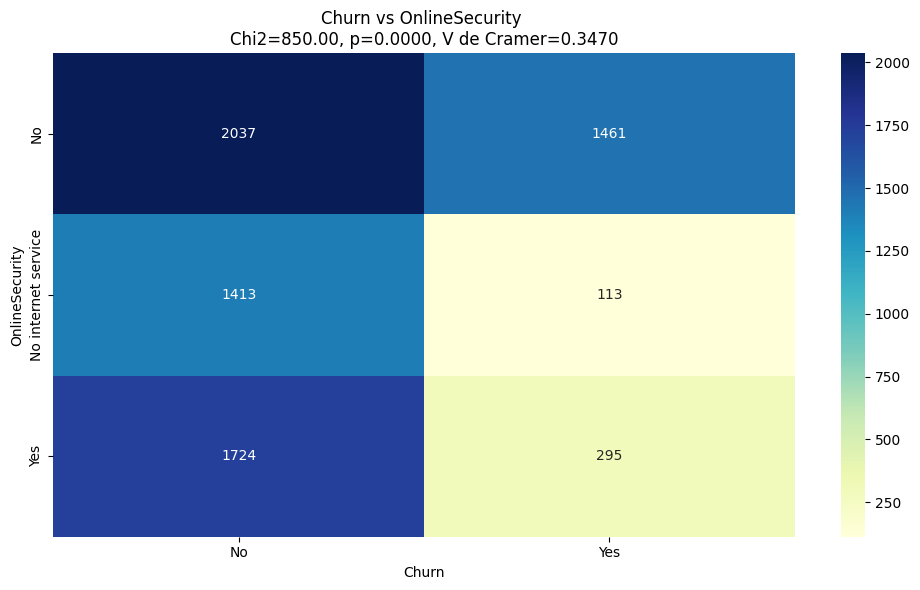


Variable: OnlineBackup
Tableau de contingence :
Churn                  No   Yes
OnlineBackup                   
No                   1855  1233
No internet service  1413   113
Yes                  1906   523
Chi2 = 601.8128, p-value = 0.0000, degrés de liberté = 2
V de Cramer = 0.2919


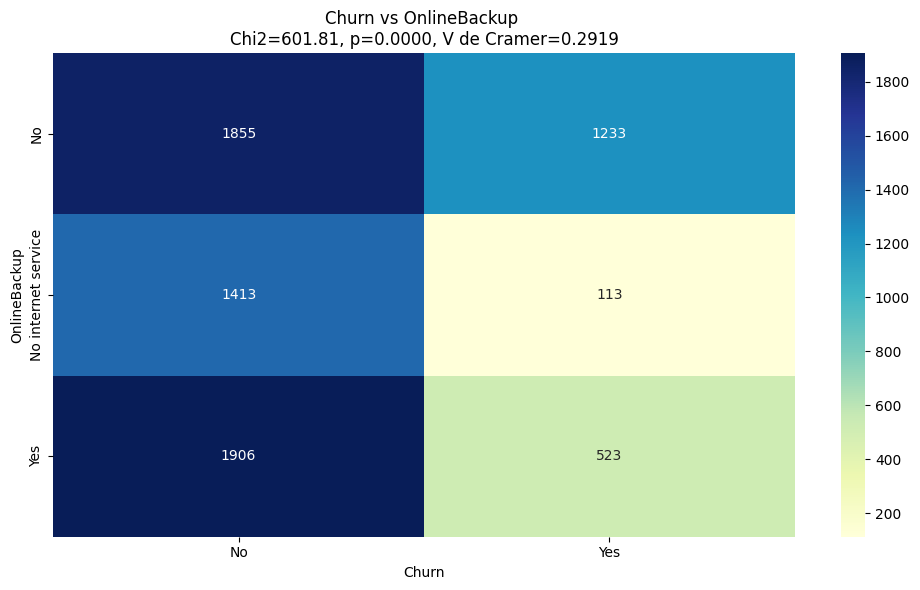


Variable: DeviceProtection
Tableau de contingence :
Churn                  No   Yes
DeviceProtection               
No                   1884  1211
No internet service  1413   113
Yes                  1877   545
Chi2 = 558.4194, p-value = 0.0000, degrés de liberté = 2
V de Cramer = 0.2811


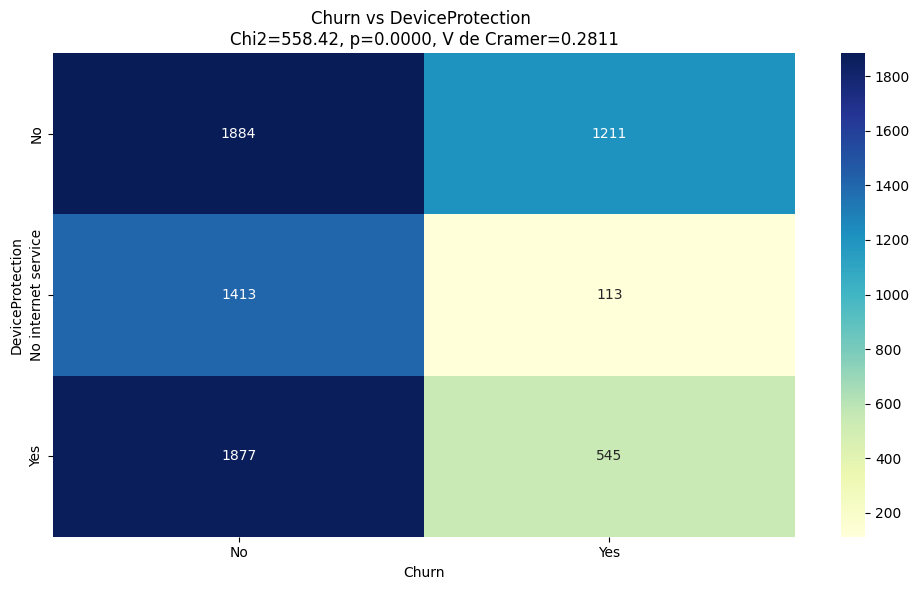


Variable: TechSupport
Tableau de contingence :
Churn                  No   Yes
TechSupport                    
No                   2027  1446
No internet service  1413   113
Yes                  1734   310
Chi2 = 828.1971, p-value = 0.0000, degrés de liberté = 2
V de Cramer = 0.3425


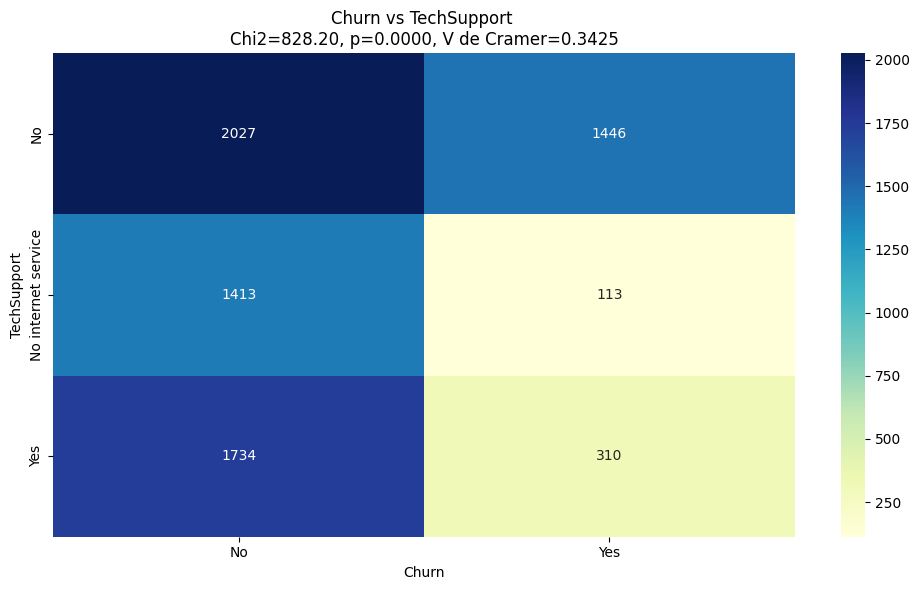


Variable: StreamingTV
Tableau de contingence :
Churn                  No  Yes
StreamingTV                   
No                   1868  942
No internet service  1413  113
Yes                  1893  814
Chi2 = 374.2039, p-value = 0.0000, degrés de liberté = 2
V de Cramer = 0.2299


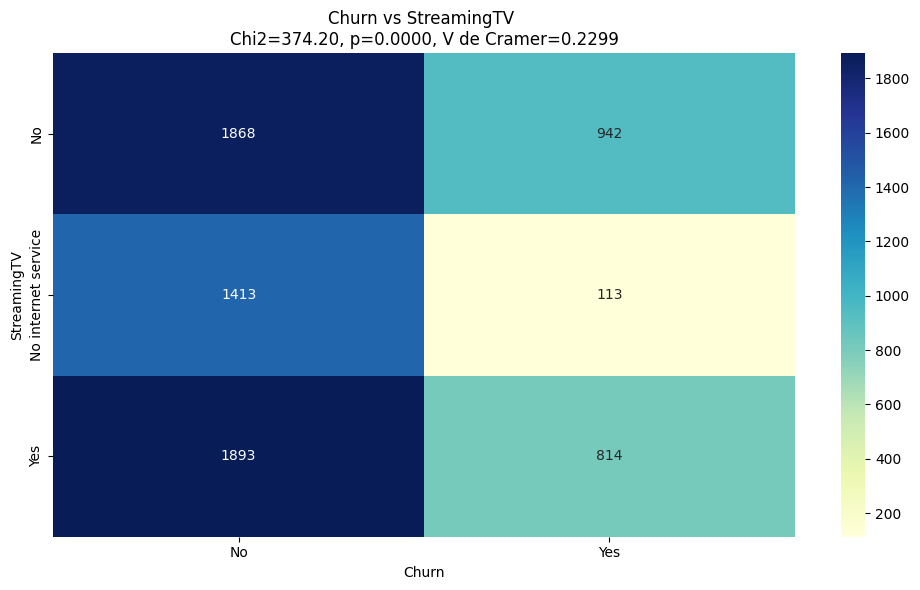


Variable: StreamingMovies
Tableau de contingence :
Churn                  No  Yes
StreamingMovies               
No                   1847  938
No internet service  1413  113
Yes                  1914  818
Chi2 = 375.6615, p-value = 0.0000, degrés de liberté = 2
V de Cramer = 0.2304


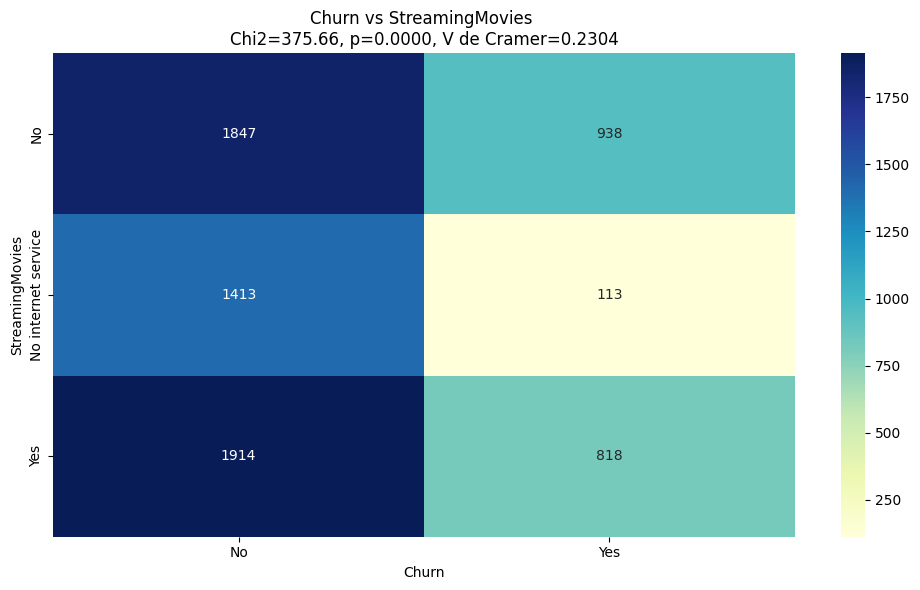


Variable: Contract
Tableau de contingence :
Churn             No   Yes
Contract                  
Month-to-month  2220  1655
One year        1307   166
Two year        1647    48
Chi2 = 1184.5966, p-value = 0.0000, degrés de liberté = 2
V de Cramer = 0.4098


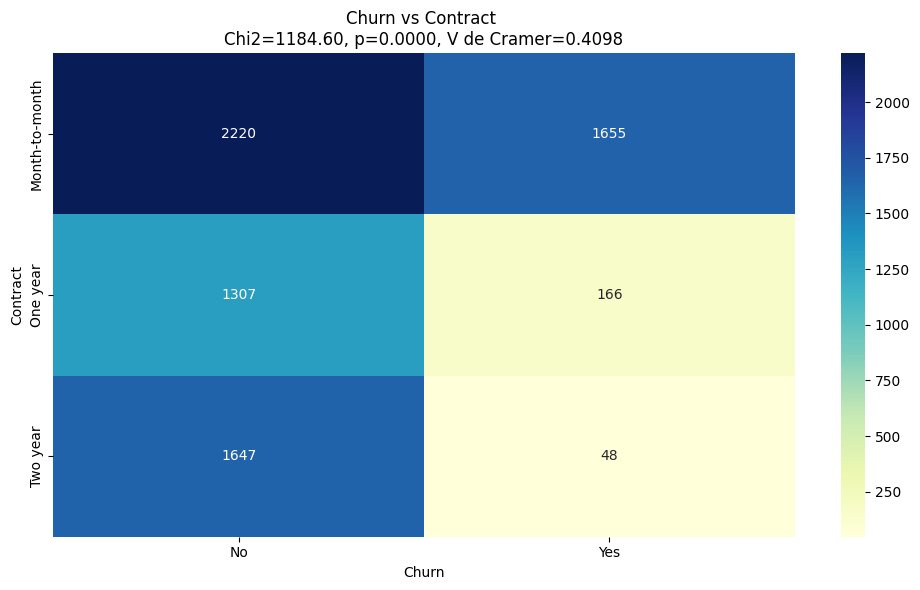


Variable: PaperlessBilling
Tableau de contingence :
Churn               No   Yes
PaperlessBilling            
No                2403   469
Yes               2771  1400
Chi2 = 258.2776, p-value = 0.0000, degrés de liberté = 1
V de Cramer = 0.1911


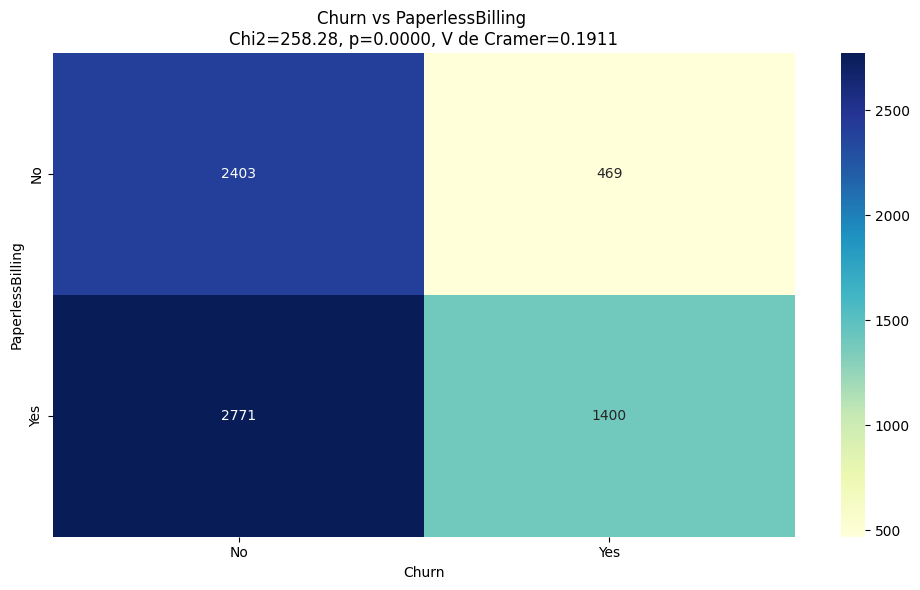


Variable: PaymentMethod
Tableau de contingence :
Churn                        No   Yes
PaymentMethod                        
Bank transfer (automatic)  1286   258
Credit card (automatic)    1290   232
Electronic check           1294  1071
Mailed check               1304   308
Chi2 = 648.1423, p-value = 0.0000, degrés de liberté = 3
V de Cramer = 0.3027


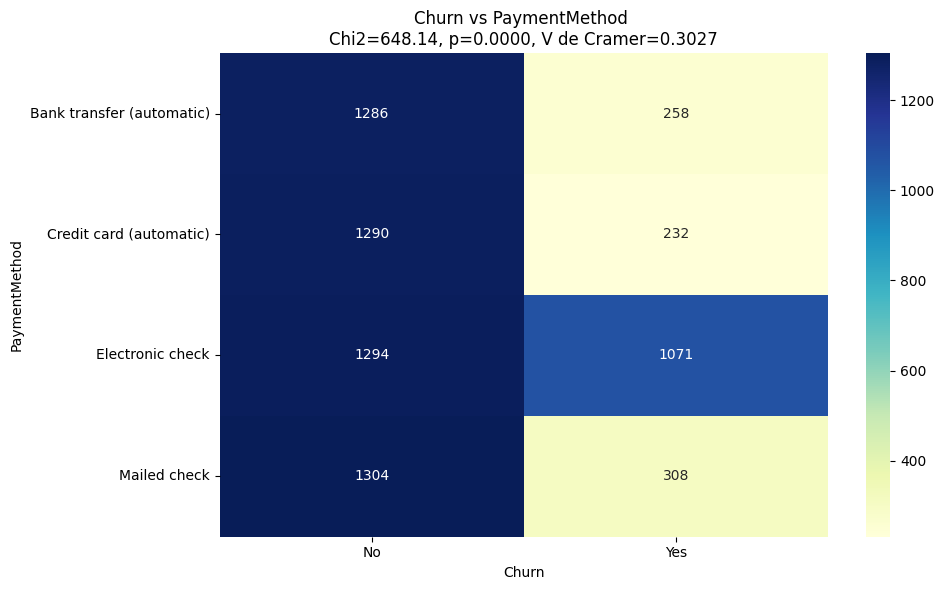


Variable: Churn
Tableau de contingence :
Churn    No   Yes
Churn            
No     5174     0
Yes       0  1869
Chi2 = 7037.8714, p-value = 0.0000, degrés de liberté = 1
V de Cramer = 0.9996


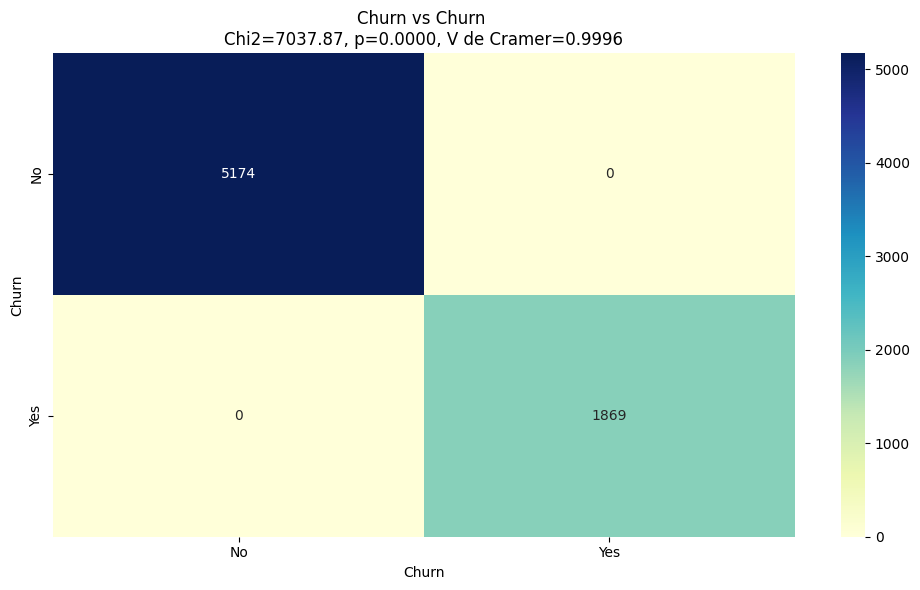

In [17]:
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
target_column = 'Churn'

# Fonction pour calculer le V de Cramer
def cramers_v(confusion_matrix):
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))  # correction pour les petits échantillons
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Boucle sur chaque variable catégorielle
for var in cat_var:
    print(f"\nVariable: {var}")
    
    # Tableau de contingence
    contingency_table = pd.crosstab(data[var], data[target_column])
    print("Tableau de contingence :")
    print(contingency_table)
    
    # Test du khi2
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    
    # V de Cramer
    v_cramer = cramers_v(contingency_table)
    
    print(f"Chi2 = {chi2:.4f}, p-value = {p_value:.4f}, degrés de liberté = {dof}")
    print(f"V de Cramer = {v_cramer:.4f}")
    
    # Graphique : Heatmap du tableau de contingence
    plt.figure(figsize=(10, 6))
    sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlGnBu')
    plt.title(f'Churn vs {var} \nChi2={chi2:.2f}, p={p_value:.4f}, V de Cramer={v_cramer:.4f}')
    plt.xlabel('Churn')
    plt.ylabel(var)
    plt.tight_layout()
    plt.show()

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

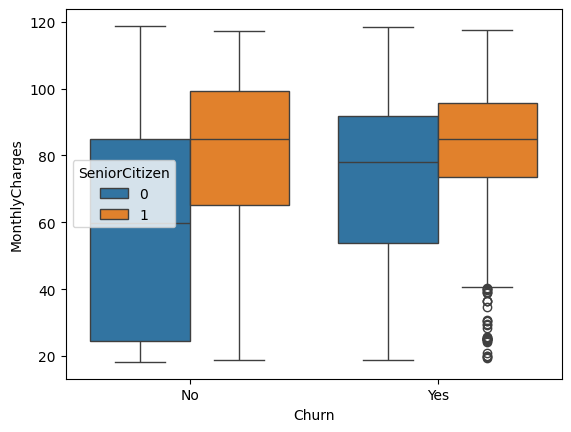

In [18]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=data, hue="SeniorCitizen")

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

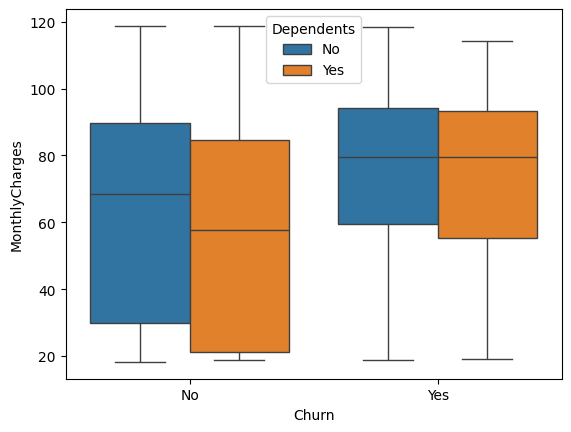

In [19]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=data, hue="Dependents")


In [20]:
df = data.copy()

In [21]:
df.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [22]:
df.dropna(inplace=True)

In [23]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [24]:
df['gender'] = df['gender'].apply(lambda row: 1 if row == 'female' else 0)
df['gender']

0       0
1       0
2       0
3       0
4       0
       ..
7038    0
7039    0
7040    0
7041    0
7042    0
Name: gender, Length: 7032, dtype: int64

In [25]:
binary_col = df.drop('gender',axis=1).nunique()[df.drop('gender', axis=1).nunique()<3].keys().to_list()

for col in binary_col:
    df[col] = df[col].apply(lambda row: 1 if row =='Yes' else 0)

In [26]:
categorie_var = df.select_dtypes(include=['object', 'category']).columns

n_unique = df[categorie_var].nunique()

cat_col = n_unique[n_unique > 2].index.tolist()
cat_col = pd.get_dummies(data=df[cat_col], columns=cat_col, drop_first=True)

In [27]:
numeric_var = df[['tenure', 'MonthlyCharges', 'TotalCharges']]
numeric_var


,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65
...,...,...,...
7038,24,84.80,1990.50
7039,72,103.20,7362.90
7040,11,29.60,346.45
7041,4,74.40,306.60


In [28]:
cat_col

,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,True,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,True,False,False,False,True,...,False,False,False,False,False,True,False,False,False,True
2,False,False,False,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
3,True,False,False,False,False,True,False,False,False,True,...,True,False,False,False,False,True,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,True,False,False,False,True,False,False,False,True,...,True,False,True,False,True,True,False,False,False,True
7039,False,True,True,False,False,False,False,True,False,True,...,False,False,True,False,True,True,False,True,False,False
7040,True,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
7041,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [29]:
df['gender']

0       0
1       0
2       0
3       0
4       0
       ..
7038    0
7039    0
7040    0
7041    0
7042    0
Name: gender, Length: 7032, dtype: int64

In [30]:
df[binary_col]

,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn
0,0,1,0,0,1,0
1,0,0,0,1,0,0
2,0,0,0,1,1,1
3,0,0,0,0,0,0
4,0,0,0,1,1,1
...,...,...,...,...,...,...
7038,0,1,1,1,1,0
7039,0,1,1,1,1,0
7040,0,1,1,0,1,0
7041,0,1,0,1,1,1


In [31]:
df = pd.concat([df['gender'], df[binary_col], cat_col, numeric_var], axis=1)

In [32]:
df

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
0,0,0,1,0,0,1,0,True,False,False,...,False,False,False,False,False,True,False,1,29.85,29.85
1,0,0,0,0,1,0,0,False,False,False,...,False,False,True,False,False,False,True,34,56.95,1889.50
2,0,0,0,0,1,1,1,False,False,False,...,False,False,False,False,False,False,True,2,53.85,108.15
3,0,0,0,0,0,0,0,True,False,False,...,False,False,True,False,False,False,False,45,42.30,1840.75
4,0,0,0,0,1,1,1,False,False,True,...,False,False,False,False,False,True,False,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,1,1,0,False,True,False,...,False,True,True,False,False,False,True,24,84.80,1990.50
7039,0,0,1,1,1,1,0,False,True,True,...,False,True,True,False,True,False,False,72,103.20,7362.90
7040,0,0,1,1,0,1,0,True,False,False,...,False,False,False,False,False,True,False,11,29.60,346.45
7041,0,0,1,0,1,1,1,False,True,True,...,False,False,False,False,False,False,True,4,74.40,306.60


In [33]:
df.shape

(7032, 31)

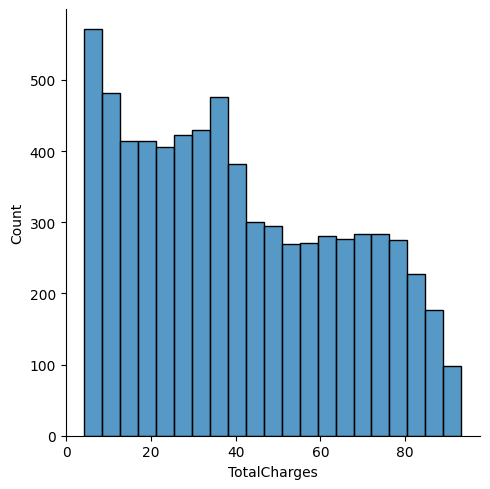

In [34]:
df['TotalCharges'] = np.sqrt(df['TotalCharges'])

sns.displot(df['TotalCharges'], kde=False)

In [35]:
df['TotalCharges'].skew()

np.float64(0.3089261418986736)

In [36]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [37]:
X

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
0,0,0,1,0,0,1,True,False,False,False,...,False,False,False,False,False,True,False,1,29.85,5.463515
1,0,0,0,0,1,0,False,False,False,False,...,False,False,True,False,False,False,True,34,56.95,43.468379
2,0,0,0,0,1,1,False,False,False,False,...,False,False,False,False,False,False,True,2,53.85,10.399519
3,0,0,0,0,0,0,True,False,False,False,...,False,False,True,False,False,False,False,45,42.30,42.903963
4,0,0,0,0,1,1,False,False,True,False,...,False,False,False,False,False,True,False,2,70.70,12.314625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,1,1,False,True,False,False,...,False,True,True,False,False,False,True,24,84.80,44.615020
7039,0,0,1,1,1,1,False,True,True,False,...,False,True,True,False,True,False,False,72,103.20,85.807342
7040,0,0,1,1,0,1,True,False,False,False,...,False,False,False,False,False,True,False,11,29.60,18.613167
7041,0,0,1,0,1,1,False,True,True,False,...,False,False,False,False,False,False,True,4,74.40,17.509997


In [38]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_train.shape, X_test.shape


((4219, 30), (2813, 30))

In [40]:
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42, stratify=y_test)
X_val.shape, X_test.shape


((1406, 30), (1407, 30))

In [41]:
pd.DataFrame(y).value_counts(normalize=True)

Churn
0        0.734215
1        0.265785
Name: proportion, dtype: float64

In [42]:
pd.DataFrame(y_test).value_counts(normalize=True)

Churn
0        0.734186
1        0.265814
Name: proportion, dtype: float64

In [43]:
pd.DataFrame(y_val).value_counts(normalize=True)


Churn
0        0.733997
1        0.266003
Name: proportion, dtype: float64

In [44]:
X2 = pd.DataFrame(X_train, columns=X.columns)
X2['Churn'] = y_train.values

minorite = X2[X2.Churn == 1]
majorite = X2[X2.Churn == 0]

minorite_upsample = resample(minorite, replace=True, n_samples= len(majorite),random_state=42)

upsample = pd.concat([majorite, minorite_upsample])

upsample

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges,Churn
2537,0,0,0,0,1,0,False,True,True,False,...,True,False,True,False,False,False,72,113.40,90.355409,0
6663,0,0,0,0,1,1,False,False,False,False,...,False,False,False,False,True,False,1,54.65,7.392564,0
4034,0,0,1,1,1,0,False,False,False,False,...,False,False,False,False,False,False,8,44.65,19.213277,0
6806,0,0,1,0,1,0,False,False,False,True,...,False,False,True,False,False,True,40,19.10,27.930270,0
1667,0,0,0,0,1,1,False,True,False,True,...,False,True,False,True,False,False,14,24.80,17.935997,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5799,0,0,0,0,0,1,True,False,False,False,...,True,False,False,False,True,False,13,35.10,21.121080,1
6089,0,0,1,0,1,1,False,True,True,False,...,False,False,False,False,True,False,1,90.60,9.518403,1
3716,0,0,1,0,1,1,False,True,True,False,...,True,False,False,False,True,False,11,102.00,33.843020,1
3028,0,0,0,0,0,1,True,False,False,False,...,False,False,False,False,False,True,5,43.25,14.798649,1


In [45]:
upsample['Churn'].value_counts(normalize=True)

Churn
0    0.5
1    0.5
Name: proportion, dtype: float64

In [46]:
X_train_up = upsample.drop('Churn', axis=1)
y_train_up = upsample['Churn']

In [47]:


majorite_upsample = resample(majorite, replace=True, n_samples=len(minorite),random_state=42)

downsample = pd.concat([minorite, majorite_upsample])

downsample

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges,Churn
810,0,0,0,0,1,1,False,True,True,False,...,True,True,False,False,False,False,58,103.25,77.573514,1
3049,0,0,0,0,1,0,False,False,False,True,...,False,False,False,False,True,False,3,19.75,7.671375,1
207,0,0,0,0,1,0,False,False,True,False,...,True,False,False,False,True,False,1,79.90,8.938680,1
5215,0,0,1,0,1,0,False,False,False,True,...,False,False,False,False,False,False,8,20.15,12.500000,1
4746,0,0,0,0,1,1,False,True,True,False,...,False,False,False,False,True,False,2,76.50,12.745587,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1370,0,0,0,0,1,1,False,False,False,True,...,False,False,True,False,False,False,27,20.25,23.199138,0
6019,0,0,0,0,1,1,False,True,False,False,...,True,True,False,False,True,False,41,80.55,57.130552,0
6441,0,0,1,1,1,1,False,False,False,False,...,False,False,False,True,False,False,17,55.35,30.339743,0
5052,0,0,0,1,1,1,False,False,False,False,...,False,False,False,True,False,False,18,45.65,27.334959,0


In [48]:
downsample['Churn'].value_counts(normalize=True)

Churn
1    0.5
0    0.5
Name: proportion, dtype: float64

In [49]:
X_train_down = downsample.drop('Churn', axis=1)
y_train_down = downsample['Churn']

# changer le train

In [50]:
train_features = X_train_down
train_label = y_train_down

In [51]:
scaler = StandardScaler()
mod_scaler = scaler.fit(train_features)
train_features = mod_scaler.transform(train_features)

X_val = mod_scaler.transform(X_val)
X_test = mod_scaler.transform(X_test)

train_features = pd.DataFrame(train_features, columns=X.columns)
X_val = pd.DataFrame(X_val, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [52]:
train_features.describe()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
count,2242.0,2242.0,2.242000e+03,2.242000e+03,2.242000e+03,2.242000e+03,2.242000e+03,2.242000e+03,2.242000e+03,2.242000e+03,...,2.242000e+03,2.242000e+03,2.242000e+03,2.242000e+03,2.242000e+03,2.242000e+03,2.242000e+03,2.242000e+03,2.242000e+03,2.242000e+03
mean,0.0,0.0,1.014156e-16,3.803083e-17,1.529156e-16,2.535389e-17,-6.021549e-17,4.436931e-17,5.070778e-17,-5.070778e-17,...,-5.070778e-17,-8.873861e-17,-3.803083e-17,-5.070778e-17,-7.606167e-17,-5.070778e-17,8.240014e-17,7.606167e-17,-7.606167e-17,-2.535389e-16
std,0.0,0.0,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00,...,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00
min,0.0,0.0,-8.892327e-01,-5.928039e-01,-3.110658e+00,-1.323223e+00,-3.214754e-01,-8.629873e-01,-1.059767e+00,-4.416967e-01,...,-4.416967e-01,-8.083269e-01,-4.337388e-01,-4.638708e-01,-4.709547e-01,-8.388369e-01,-5.212446e-01,-1.106430e+00,-1.707024e+00,-1.369861e+00
25%,0.0,0.0,-8.892327e-01,-5.928039e-01,3.214754e-01,-1.323223e+00,-3.214754e-01,-8.629873e-01,-1.059767e+00,-4.416967e-01,...,-4.416967e-01,-8.083269e-01,-4.337388e-01,-4.638708e-01,-4.709547e-01,-8.388369e-01,-5.212446e-01,-9.414350e-01,-7.907562e-01,-8.837398e-01
50%,0.0,0.0,-8.892327e-01,-5.928039e-01,3.214754e-01,7.557303e-01,-3.214754e-01,-8.629873e-01,9.436037e-01,-4.416967e-01,...,-4.416967e-01,-8.083269e-01,-4.337388e-01,-4.638708e-01,-4.709547e-01,-8.388369e-01,-5.212446e-01,-2.814554e-01,2.315827e-01,-1.702047e-01
75%,0.0,0.0,1.124565e+00,1.686898e+00,3.214754e-01,7.557303e-01,-3.214754e-01,1.158766e+00,9.436037e-01,-4.416967e-01,...,-4.416967e-01,1.237123e+00,-4.337388e-01,-4.638708e-01,-4.709547e-01,1.192127e+00,-5.212446e-01,8.735089e-01,8.162692e-01,8.113434e-01
max,0.0,0.0,1.124565e+00,1.686898e+00,3.214754e-01,7.557303e-01,3.110658e+00,1.158766e+00,9.436037e-01,2.263997e+00,...,2.263997e+00,1.237123e+00,2.305535e+00,2.155773e+00,2.123346e+00,1.192127e+00,1.918485e+00,1.822230e+00,1.730381e+00,2.225127e+00


In [53]:
rf = RandomForestClassifier(random_state=42)
rf.fit(train_features, train_label)

print(classification_report(y_val, rf.predict(X_val)))

              precision    recall  f1-score   support

           0       0.89      0.71      0.79      1032
           1       0.49      0.76      0.60       374

    accuracy                           0.72      1406
   macro avg       0.69      0.74      0.69      1406
weighted avg       0.78      0.72      0.74      1406



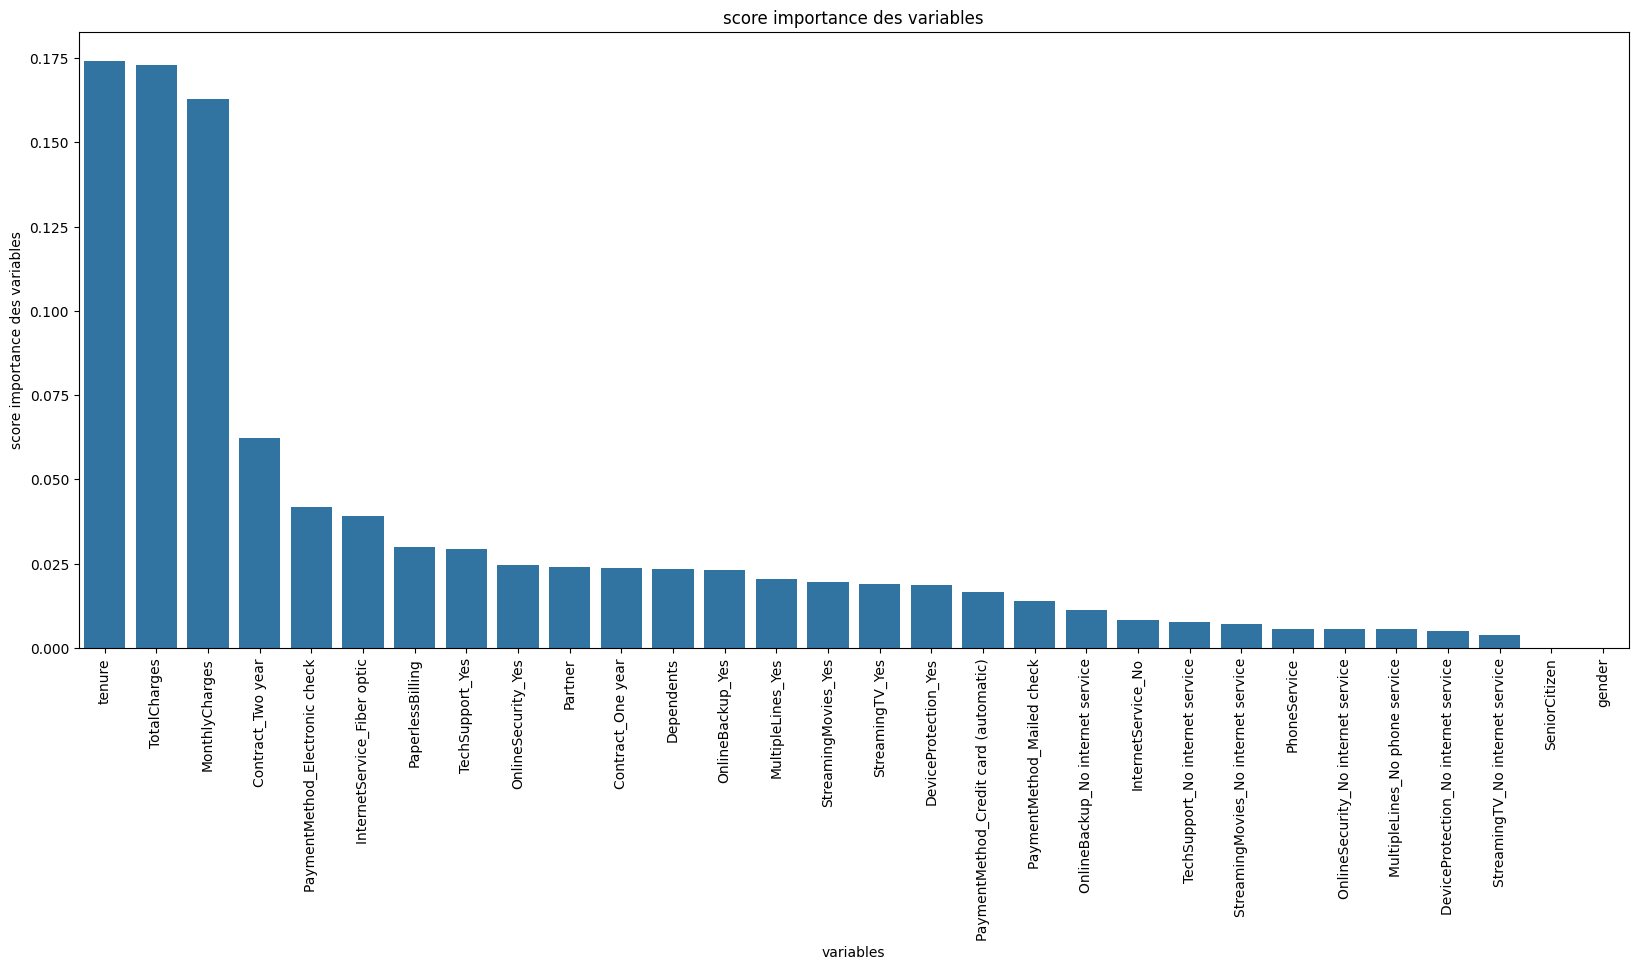

In [54]:
vars_imp = pd.Series(rf.feature_importances_, index= train_features.columns).sort_values(ascending=False)

plt.figure(figsize=(20,8))
sns.barplot(x=vars_imp.index, y=vars_imp)
plt.xticks(rotation=90)
plt.xlabel('variables')
plt.ylabel('score importance des variables')
plt.title('score importance des variables')
plt.show()

In [55]:
seuil = 0.004
vars_selected = vars_imp[vars_imp > seuil].index.to_list()

train_features = train_features[vars_selected]

X_val = X_val[vars_selected]

X_test = X_test[vars_selected]

In [56]:
param_grid  = {'C':[0.001, 0.01 ,0.1 , 1, 10, 50 , 100, 500]}

In [57]:
grid_logreg_class = GridSearchCV(estimator=LogisticRegression(random_state=42, max_iter=500), param_grid=param_grid, scoring='f1', cv=5)

logreg_model = grid_logreg_class.fit(train_features, train_label)

print(round(logreg_model.best_score_,3))

print(logreg_model.best_estimator_)

0.761
LogisticRegression(C=0.01, max_iter=500, random_state=42)


In [75]:
def model_evaluation(model, features, labels):
    pred = model.predict(features)
    print(classification_report(labels, pred))


def conf_mat(model, features, labels):
        cm = confusion_matrix(labels,  model.predict(features))

        # 👉 Affichage en heatmap
        plt.figure(figsize=(6,4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
        plt.xlabel('Prédictions')
        plt.ylabel('Valeurs Réelles')
        plt.title('Matrice de Confusion')
        plt.show()

def courbe_roc(model, features, labels,features_val, labels_val):
      
    # Courbe ROC pour le jeu de données test
    # Courbe ROC
    y_train_pred_prob = model.predict_proba(features)[:,1]
    y_test_pred_prob = model.predict_proba(features_val)[:,1]

    fpr_test, tpr_test, _ = roc_curve(labels_val, y_test_pred_prob)
    roc_auc_test = auc(fpr_test, tpr_test)

    # Courbe ROC pour le jeu de données d'entraînement
    fpr_train, tpr_train, _ = roc_curve(labels, y_train_pred_prob)
    roc_auc_train = auc(fpr_train, tpr_train)

    # Affichage des courbes ROC
    plt.figure()
    plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label='ROC curve (area = %0.2f) Test' % roc_auc_test)
    plt.plot(fpr_train, tpr_train, color='blue', lw=2, label='ROC curve (area = %0.2f) Train' % roc_auc_train)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()



In [97]:
recall_score(y_val, logreg_model.best_estimator_.predict(X_val))

0.7887700534759359

In [76]:
model_evaluation(logreg_model.best_estimator_, X_val, y_val)

              precision    recall  f1-score   support

           0       0.90      0.71      0.80      1032
           1       0.50      0.79      0.61       374

    accuracy                           0.73      1406
   macro avg       0.70      0.75      0.70      1406
weighted avg       0.80      0.73      0.75      1406



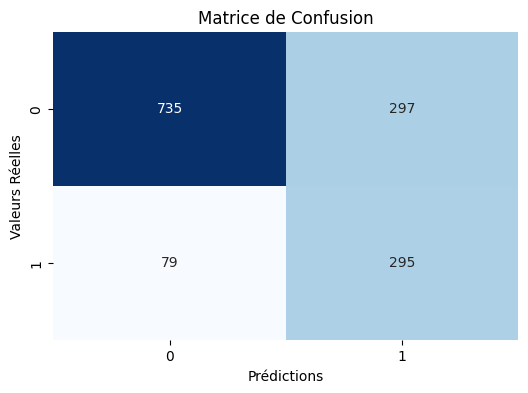

In [77]:
conf_mat(logreg_model.best_estimator_, X_val, y_val)

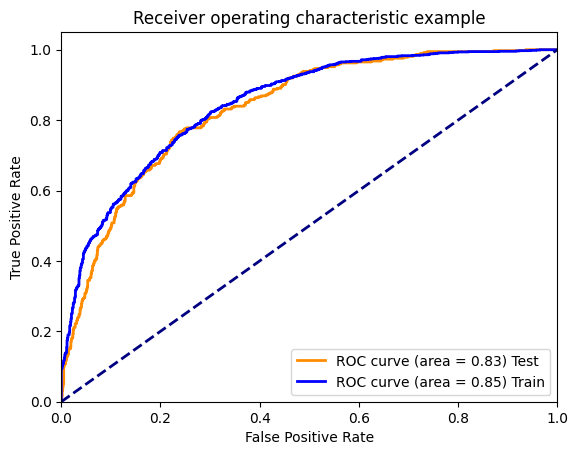

In [78]:
courbe_roc(logreg_model.best_estimator_, train_features, train_label,X_val, y_val)
      

In [62]:
param_grid_rf  = {'n_estimators':[10, 50 , 100, 500, 1000], 'max_depth':[3, 5, 10, 20, None]}
grid_rf_class = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid_rf, scoring='f1', cv=5)

rf_model = grid_rf_class.fit(train_features, train_label)

print(round(rf_model.best_score_,3))

print(rf_model.best_estimator_)

0.78
RandomForestClassifier(n_estimators=500, random_state=42)


In [96]:
recall_score(y_val, rf_model.best_estimator_.predict(X_val))

0.7540106951871658

In [63]:
model_evaluation(rf_model.best_estimator_, X_val, y_val)

              precision    recall  f1-score   support

           0       0.89      0.70      0.78      1032
           1       0.48      0.75      0.58       374

    accuracy                           0.71      1406
   macro avg       0.68      0.73      0.68      1406
weighted avg       0.78      0.71      0.73      1406



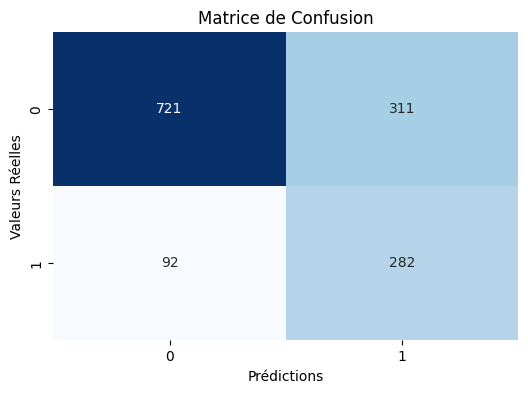

In [79]:
conf_mat(rf_model.best_estimator_, X_val, y_val)

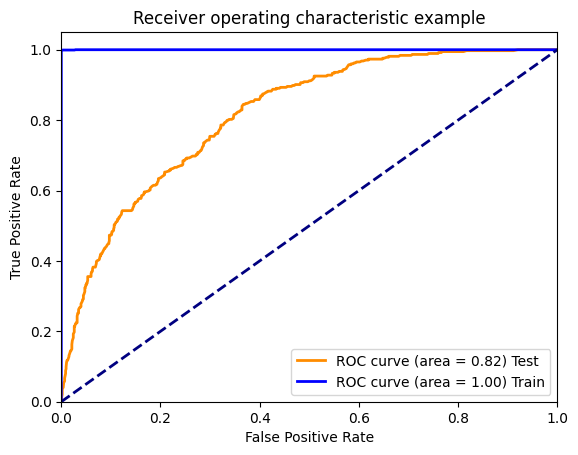

In [80]:
courbe_roc(rf_model.best_estimator_, train_features, train_label,X_val, y_val)


In [64]:
mlp = MLPClassifier(random_state=42, max_iter=500)

parameter = {'hidden_layer_sizes':[(50,), (100,), (200,)],
             'learning_rate':['constant', 'invscaling','adataptive'],
             'activation':['identity', 'logistic', 'tanh', 'relu']}

mlp_cv = GridSearchCV(mlp, parameter, scoring='f1', cv=5, n_jobs=-1)

mlp_model = mlp_cv.fit(train_features, train_label)

print(round(mlp_model.best_score_,3))

print(mlp_model.best_estimator_)

c:\Users\PP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\PP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\PP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\PP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 436

0.761
MLPClassifier(activation='identity', hidden_layer_sizes=(200,), max_iter=500,
              random_state=42)


In [95]:
recall_score(y_val, mlp_model.best_estimator_.predict(X_val))

0.7834224598930482

In [83]:
model_evaluation(mlp_model.best_estimator_, X_val, y_val)


              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1032
           1       0.52      0.78      0.62       374

    accuracy                           0.75      1406
   macro avg       0.71      0.76      0.72      1406
weighted avg       0.80      0.75      0.76      1406



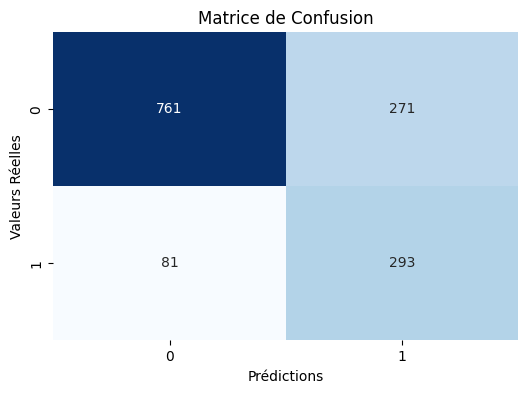

In [82]:
conf_mat(mlp_model.best_estimator_, X_val, y_val)

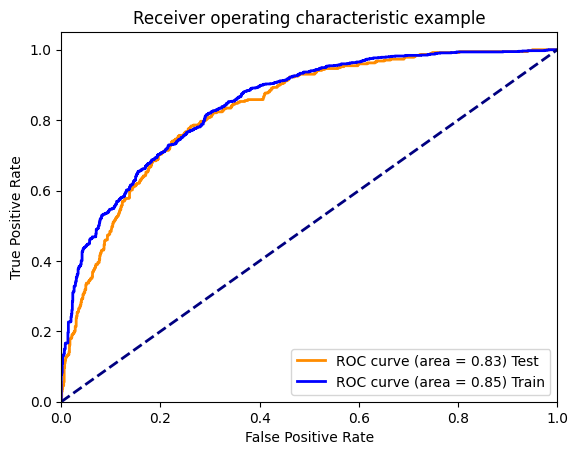

In [81]:
courbe_roc(mlp_model.best_estimator_, train_features, train_label,X_val, y_val)


In [66]:
svm_model = SVC(random_state=42)

svc_param = {
    'kernel':['linear','rbf'],
    'C':[0.1, 1.0, 10, 50, 100]
}

svc_cv = GridSearchCV(svm_model, svc_param, scoring='f1', cv=5)

svc_model = svc_cv.fit(train_features, train_label)

print(round(svc_model.best_score_,3))

print(svc_model.best_estimator_)

0.763
SVC(C=10, random_state=42)


In [94]:
recall_score(y_val, svc_model.best_estimator_.predict(X_val))

0.7566844919786097

In [67]:
model_evaluation(svc_model.best_estimator_, X_val, y_val)


              precision    recall  f1-score   support

           0       0.88      0.67      0.76      1032
           1       0.45      0.76      0.57       374

    accuracy                           0.69      1406
   macro avg       0.67      0.71      0.66      1406
weighted avg       0.77      0.69      0.71      1406



In [68]:
from sklearn.ensemble import AdaBoostClassifier

adab_model = AdaBoostClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200,300],
    'learning_rate': [0.01, 0.1,0.5,0.6,0.7,0.8, 1.0]
}

adab_cv = GridSearchCV(adab_model, param_grid, scoring='f1', cv=5)

adab_model = adab_cv.fit(train_features, train_label)

print(round(adab_model.best_score_,3))

print(adab_model.best_estimator_)

0.766
AdaBoostClassifier(learning_rate=0.1, n_estimators=100, random_state=42)


In [93]:
recall_score(y_val, adab_model.best_estimator_.predict(X_val))


0.8449197860962567

In [69]:
model_evaluation(adab_model.best_estimator_, X_val, y_val)

              precision    recall  f1-score   support

           0       0.92      0.61      0.73      1032
           1       0.44      0.84      0.58       374

    accuracy                           0.67      1406
   macro avg       0.68      0.73      0.65      1406
weighted avg       0.79      0.67      0.69      1406



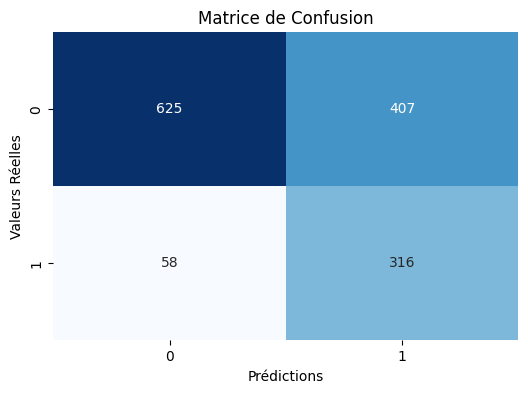

In [87]:
conf_mat(adab_model.best_estimator_, X_val, y_val)

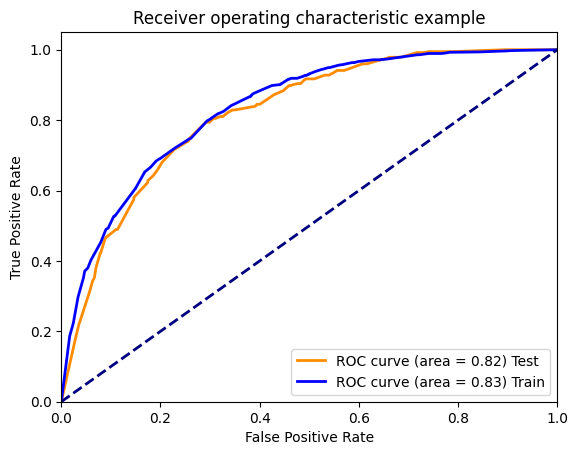

In [86]:
courbe_roc(adab_model.best_estimator_, train_features, train_label,X_val, y_val)


In [70]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier()

param_grid = {
    # max_depth est la profondeur maximale de chaque arbre. Une valeur plus élevée rendra le modèle plus complexe et pourrait entraîner un surapprentissage.
    'max_depth': [3, 4, 5,7,8],
    
    # learning_rate (ou taux d'apprentissage) est le pas d'ajustement effectué à chaque étape de l'optimisation. Une valeur plus faible rendra l'apprentissage plus lent.
    'learning_rate': [0.01, 0.1, 0.2],
    
    # n_estimators est le nombre d'arbres à construire.
    'n_estimators': [100, 200, 300,500,1000],
    
    
}


xgb_cv = GridSearchCV(xgb_model, param_grid, scoring='f1', cv=5)

xgb_model = xgb_cv.fit(train_features, train_label)

print(round(xgb_model.best_score_,3))

print(xgb_model.best_estimator_)

0.769
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)


In [92]:
recall_score(y_val, xgb_model.best_estimator_.predict(X_val))

0.8288770053475936

In [71]:
model_evaluation(xgb_model.best_estimator_, X_val, y_val)

              precision    recall  f1-score   support

           0       0.92      0.68      0.78      1032
           1       0.48      0.83      0.61       374

    accuracy                           0.72      1406
   macro avg       0.70      0.75      0.69      1406
weighted avg       0.80      0.72      0.73      1406



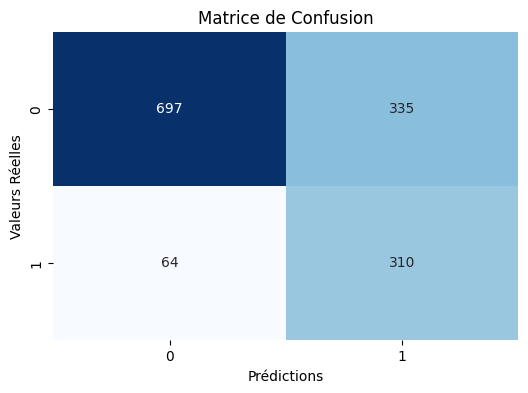

In [88]:
conf_mat(xgb_model.best_estimator_, X_val, y_val)


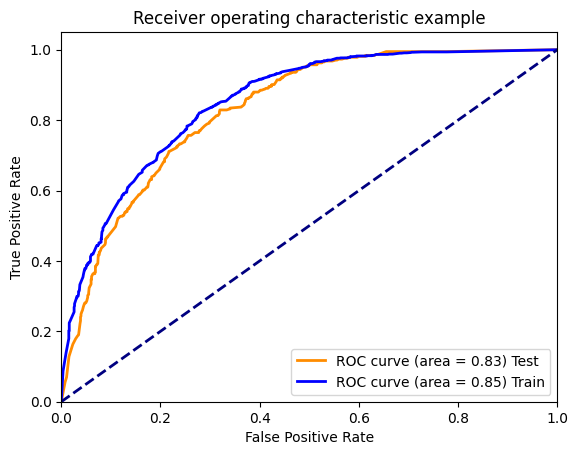

In [89]:
courbe_roc(xgb_model.best_estimator_, train_features, train_label,X_val, y_val)
